## Genre Analysis

### Q1: What is the distribution of ratings across different genres? Do some genres receive higher overall ratings than others?

In [1]:
#data manipulation
import pandas as pd
import numpy as np

#display entire output of a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#hide warnings from jupyter notebook
import warnings
warnings.filterwarnings('ignore')

#display all columns
pd.set_option("display.max.columns", None)

#visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# statistics
import scipy

In [6]:
# read goodreads csv file into a dataframe. This csv file was created once duplicates were removed
goodreads = pd.read_csv('../data/goodreads_cleaned.csv')

In [7]:
goodreads.head()

book_id                                              title        isbn  \
0  11346143                       Strange Case Of Origami Yoda  0810996502   
1  12354883                               Shadow the Sheep-dog         NaN   
2  12734774  Mikolay and Julia Meet the Fairies (Mikolay an...         NaN   
3    130196                            The Trumpet of the Swan  0590406191   
4  13790759  Sarah Gives Thanks: How Thanksgiving Became a ...  080757239X   

          isbn13                               title_without_series  \
0  9780810996502                       Strange Case Of Origami Yoda   
1            NaN                               Shadow the Sheep-dog   
2            NaN  Mikolay and Julia Meet the Fairies (Mikolay an...   
3  9780590406192                            The Trumpet of the Swan   
4  9780807572399  Sarah Gives Thanks: How Thanksgiving Became a ...   

                                         review_text  \
0  Quirky and silly will save it for my son when ...   
1  I read this as a kid and enjoyed it and now ha...   
2  What a delightful children's story. I can't wa...   
3  Even as an adult, I enjoy some children's lite...   
4                                 More like a 3.5'er   

                          review_id  rating                           user_id  \
0  a95478e83fb0549916181dec2e6c02de       3  ae6c9ceec7a41254191ffdb8852bd031   
1  d348df0f30853c95f16bf5f292e42bb9       3  1fee0f40606726eb46e30612e6dd8485   
2  3c550b2365eb869d57d81236f4cfbf27       5  7f778517ad88c4feed6183c54b6403e5   
3  87379d304d5d38d555e9a04b8eafe74a       3  1fa3b5759854065c9d1e1048f38d2507   
4  d2acf777a2748ec4a481de94e17a1666       3  4b3548b067eaea2a7eb23eb45da9d375   

                                             authors  average_rating  \
0                [Row(author_id='3172535', role='')]            3.90   
1  [Row(author_id='10657', role=''), Row(author_i...            4.32   
2                [Row(author_id='5236455', role='')]            4.65   
3  [Row(author_id='988142', role=''), Row(author_...            4.06   
4  [Row(author_id='5861865', role=''), Row(author...            4.08   

  country_code edition_information  n_comments  n_votes language_code  \
0           US                 NaN           0        0           eng   
1           US                 NaN           0        0           eng   
2           US                 NaN           0        1           eng   
3           US                 NaN           0        0           eng   
4           US                 NaN           0        0           eng   

   num_pages  publication_day  publication_month  publication_year  \
0      154.0              NaN                NaN               NaN   
1      188.0              NaN                NaN            1948.0   
2       38.0              NaN                9.0            2010.0   
3      210.0              NaN                NaN            1970.0   
4       32.0              1.0                9.0            2012.0   

                 publisher  ratings_count      series  \
0                      NaN            143  ['257006']   
1      Angus and Robertson             10          []   
2              Mayan Books             24  ['305783']   
3                      NaN            280          []   
4  Albert Whitman  Company            184          []   

                                       similar_books  text_reviews_count  \
0  ['7172060', '6330886', '9564947', '7739868', '...                  29   
1  ['794739', '2740021', '885350', '31964', '2220...                   2   
2                                                 []                  10   
3  ['89546', '24384', '827430', '240815', '426206...                  43   
4  ['13330625', '9885866', '13414838', '12763989'...                  49   

    work_id     genre  review_pos_score  review_neg_score  review_neu_score  \
0   7415356  children             0.249             0.000             0.751   
1   1433595  children            

In [8]:
# keep only books that have a rating (unrated books have a rating of 0, we don't need that)
goodreads_cleaned = goodreads[goodreads["rating"] != 0]

# add word count column to the dataframe
goodreads_cleaned['length_of_review'] = goodreads_cleaned['review_text'].str.split().str.len()

In [9]:
# create dataframe for each genre 
children_ratings = goodreads_cleaned.loc[goodreads_cleaned['genre']=='children']
mystery_ratings = goodreads_cleaned.loc[goodreads_cleaned['genre']=='mystery']
history_ratings = goodreads_cleaned.loc[goodreads_cleaned['genre']=='history']

Text(0.5, 0.98, 'Distribution of Ratings in Different Genres')

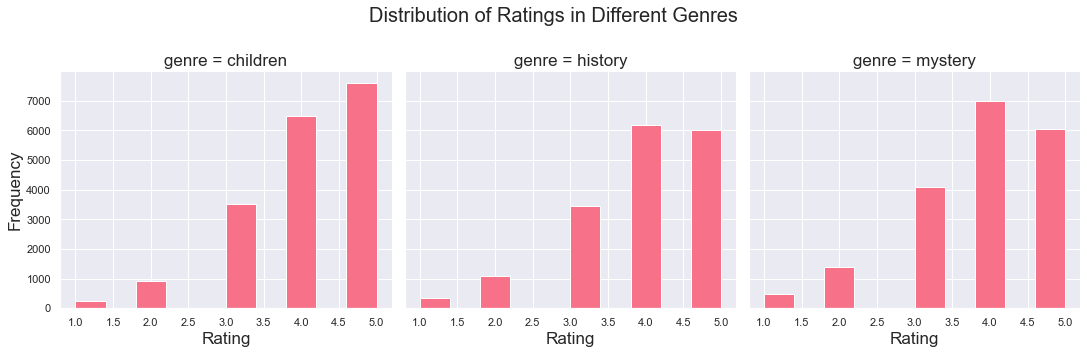

In [10]:
# explore the distribution of each genre
sns.set(rc={'figure.figsize':(6,6)})
sns.set_context("notebook", rc={"axes.labelsize":17})
sns.set_palette("husl")
g = sns.FacetGrid(goodreads_cleaned, col="genre", height = 5)
g.map(plt.hist, "rating")
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Distribution of Ratings in Different Genres', fontsize = 20)
g.set_axis_labels("Rating", "Frequency")

g.savefig('../visualizations/distribution.svg', format='svg', dpi=1200)

### Interpretation:

Based on the histograms above, all 3 genres seem to receive mostly 4 to 5 ratings, few 3 and very few 1 and 2 ratings.

### Q2: Is there a relationship between the length of reviews and ratings given? Is it different for different genres?

First, let's create a function that does the plotting for us. We will make use of Seaborn's jointplot to display the relationship between ratings and length of review as well as 1D profiles (univariate) in the margins. We will also calculate Pearson's correlation coefficient.

In [11]:
def jointplot(df, title,name):
    g = sns.jointplot("length_of_review", "rating", data=df, kind="reg", height=6, ylim=[0.5,5.5])
    g.annotate(scipy.stats.pearsonr)
    g.fig.subplots_adjust(top=0.92)
    g.fig.suptitle(title, fontsize=14)
    g.set_axis_labels("Review Length", "Rating")
    return g.savefig('../visualizations/jointplots'+name+'.svg', format='svg', dpi=1200)

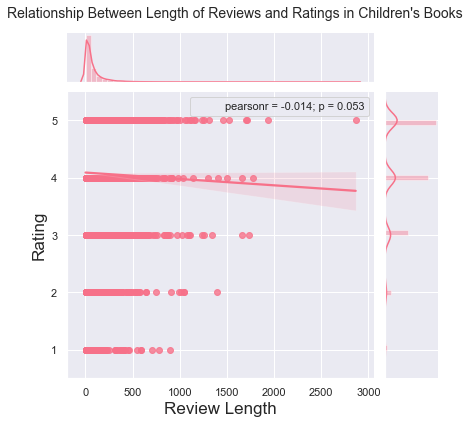

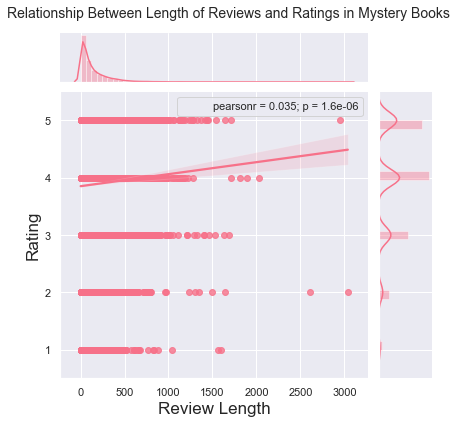

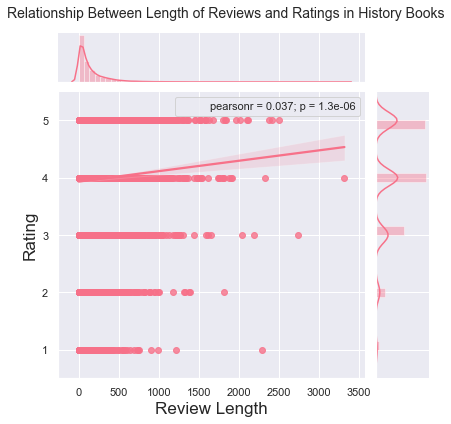

In [12]:
jointplot(children_ratings,"Relationship Between Length of Reviews and Ratings in Children's Books","children")
jointplot(mystery_ratings,"Relationship Between Length of Reviews and Ratings in Mystery Books","mystery")
jointplot(history_ratings,"Relationship Between Length of Reviews and Ratings in History Books","history")

### Interpretation:
There doesn't seem to be a correlation between review length and rating for all 3 genres. The correlation coefficient is extremenly small to be of any significance. Interestingly, the direction of the correlation seems to be negative; as the reviews get longer, the rating given gets lower. Again, given the magnitude of the coefficient, the correlation is negligible.

### Q3:  What are the words characteristic of different genres? Are they different in positive vs. negative reviews? What are the themes associated with each genre? Are they different in positive vs. negative reviews?

To explore these questions, we will make use of the sociolinguistic library Scattertext.

Scattertext is a tool designed for visualizing words and phrases that are more characteristic of a category than another by leveraging word and bigram frequencies and associations across the different categories. It works exclusively on binary categories so we will examine two genres at a time. We will be using this library to visualize what unique characteristics different genres possess.

We will further subset the data into reviews with poor ratings(1 star) and reviews with high ratings(5 stars).The output will be presented in an interactive, HTML scatter plot where points corresponding to terms are selectively labeled so that they don't overlap with other labels or points.

The HTML outputs look best in Chrome and Safari. 

* Note: Scattertext works best when used with another NLP library for tokenization (SpaCy).


## Installation

For Python 3.4 and higher: 

!pip install scattertext

!pip install empath

!pip install spacy

The English language model:

!python -m spacy download en_core_web_sm

## Import libraries

In [13]:
#data processing
import pandas as pd
import numpy as np

#Natural language processing
import spacy # used for tokenization
import scattertext as st # visualization library
nlp = spacy.load('en_core_web_sm') #English model

#display html and images in jupyter notebook
from IPython.display import Image
from IPython.display import IFrame

## Task 1: Extract terms associated with each genre (negative reviews and positive reviews)

Scattertext uses scaled f-score, which takes into account the category-specific precision and term frequency. While a term may appear frequently in both categories (children and mystery for instance), the scaled f-score determines whether the term is more characteristic of a category than others (children vs. mystery) by assigning a score from 0-1. 

In [14]:
# create a list of stop words to exclude
#source https://gist.github.com/sebleier/554280
my_stopwords = ["a", "about", "above", "after", "again", "against", "ain", "all", "am", "an", "and", "any", \
                "are", "aren", "aren't", "as", "at", "be", "because", "been", "before", "being", "below", \
                "between", "both", "but", "by", "can", "couldn", "couldn't", "d", "did", "didn", "didn't", \
                "do", "does", "doesn", "doesn't", "doing", "don", "don't", "down", "during", "each", "few", \
                "for", "from", "further", "had", "hadn", "hadn't", "has", "hasn", "hasn't", "have", "haven", \
                "haven't", "having", "he", "her", "here", "hers", "herself", "him", "himself", "his", "how", \
                "i", "if", "in", "into", "is", "isn", "isn't", "it", "it's", "its", "itself", "just", "ll", \
                "m", "ma", "me", "mightn", "mightn't", "more", "most", "mustn", "mustn't", "the", "my", "myself", \
                "needn", "needn't", "no", "nor", "not", "now", "o", "of", "off", "on", "once", "only", "or", \
                "other", "our", "ours", "ourselves", "out", "over", "own", "re", "s", "same", "shan", "shan't",\
                "she", "she's", "should", "should've", "shouldn", "shouldn't", "so", "some", "such", "t", "than",\
                "that", "that'll", "the", "their", "theirs", "them", "themselves", "then", "there", "these", \
                "they", "this", "those", "through", "to", "too", "under", "until", "up", "ve", "very", "was",\
                "wasn", "wasn't", "we", "were", "weren", "weren't", "what", "when", "where", "which", "while",\
                "who", "whom", "why", "will", "with", "won", "won't", "wouldn", "wouldn't", "y", "you", \
                "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves", "could", \
                "he'd", "he'll", "he's", "here's", "how's", "i'd", "i'll", "i'm", "i've", "let's", "ought",\
                "she'd", "she'll", "that's", "there's", "they'd", "they'll", "they're", "they've", "we'd", \
                "we'll", "we're", "we've", "what's", "when's", "where's", "who's", "why's", "would"]

#### dataframe for each genre were created in an earlier step as follows:
children_ratings- contains books in the children genre

mystery_ratings - contains books in the mystery genre

history_ratings- contains books in the history genre

In [15]:
# select only low ratings and high ratings from each dataframe

#children
children_low = children_ratings.loc[children_ratings['rating']== 1]
children_high = children_ratings.loc[children_ratings['rating']==5]

#mystery
mystery_low= mystery_ratings.loc[mystery_ratings['rating']==1]
mystery_high = mystery_ratings.loc[mystery_ratings['rating']==5]

#history
history_low= history_ratings.loc[history_ratings['rating']==1]
history_high = history_ratings.loc[history_ratings['rating']==5]

In [16]:
#concatenate the dataframes that contain low ratings/concatenate those that contain high ratings

low_children_mystery = pd.concat([children_low,mystery_low])
high_children_mystery = pd.concat([children_high,mystery_high])

low_children_history = pd.concat([children_low,history_low])
high_children_history = pd.concat([children_high,history_high])

low_mystery_history = pd.concat([mystery_low,history_low])
high_mystery_history = pd.concat([mystery_high,history_high])


#keep the review text and genre columns for the purposes of visualization
l_c_m = low_children_mystery[['review_text','genre']] #negative reviews from children and mystery genres
h_c_m = high_children_mystery[['review_text','genre']]#positive reviews from children and mystery genres
l_c_h = low_children_history[['review_text','genre']] # negative reviews from children and history genres
h_c_h = high_children_history[['review_text','genre']]#positive reviews from children and history genres
l_m_h = low_mystery_history[['review_text','genre']]#negative reviews from mystery and history genres
h_m_h = high_mystery_history[['review_text','genre']]#positive reviews from mystery and history genres

The next step is to create a function that does the plotting for us. 

To look for differences in genres, we set the category_col parameter to 'genre', and use the review text, present in the `review_text` column, as the text to analyze by setting the text col parameter.We then pass a spaCy model in to the nlp argument and call build() to construct the corpus. Finally, we remove stop words and return a stand-alone HTML file.

In [17]:
def scattertext_genre(df,category, category_name,not_category_name,title):
    ''' -input dataframe, category label, 
        category name, second category label, 
        title of plot
        -output stand-alone HTML file'''
    corpus = st.CorpusFromPandas(df,
                    category_col='genre', 
                    text_col='review_text',
                    nlp=nlp).build().remove_terms(my_stopwords, ignore_absences=True)
    html = st.produce_scattertext_explorer(corpus,
             category=category,
             category_name=category_name,
             not_category_name= not_category_name,
             width_in_pixels=1000)
    return open(title+"."+"html", 'wb').write(html.encode('utf-8'))    

In [18]:
#generate scattertext for poorly rated children and mystery genres
scattertext_genre(l_c_m,'children', 'Children','Mystery','children_mystery_low')

1081123

In [18]:
#generate scattertext for highly rated childten and mystery genres
scattertext_genre(h_c_m,'children','Children','Mystery','children_mystery_high')

11445745

In [19]:
#generate scattertext for poorly rated children and history genres
scattertext_genre(l_c_h, 'children','Children','History', 'children_history_low')

922914

In [20]:
#generate scattertext for highly rated children and history
scattertext_genre(h_c_h, 'children','Children','History', 'children_history_high')

12130525

In [21]:
#generate scattertext for poorly rated history and mystery genres
scattertext_genre(l_m_h,'mystery','Mystery','History','mystery_history_low')

1272325

In [22]:
#generate scattertext for highly rated mystery and history genres
scattertext_genre(h_m_h,'mystery','Mystery','History','mystery_history_high')

14034956

## Visualizations and Explanation of Output

How to interpret Scattertext plot:

On the right side of the scatter plot, we have an overview of top rated terms in an unordered list of terms under characteristics. If we click on the term, it will display the specific reviews within the dataset and will also indicate which category it came from. We can also manually search for a term on top right side.

The best way to interpret the plot is by quandrants. The top left corner represents terms that are frequent in category `y-axis` but infrequent in category `x-axis`. The same could be said about the bottom right corner. Terms that are frequent in both categories will appear in the top right corner.

For the color encoding, red colored dots are more frequent in the `x-axis` category and blue colored dots are more frequent in the `y-axis` category.

### Frequent terms in History vs. Mystery genres for negative reviews

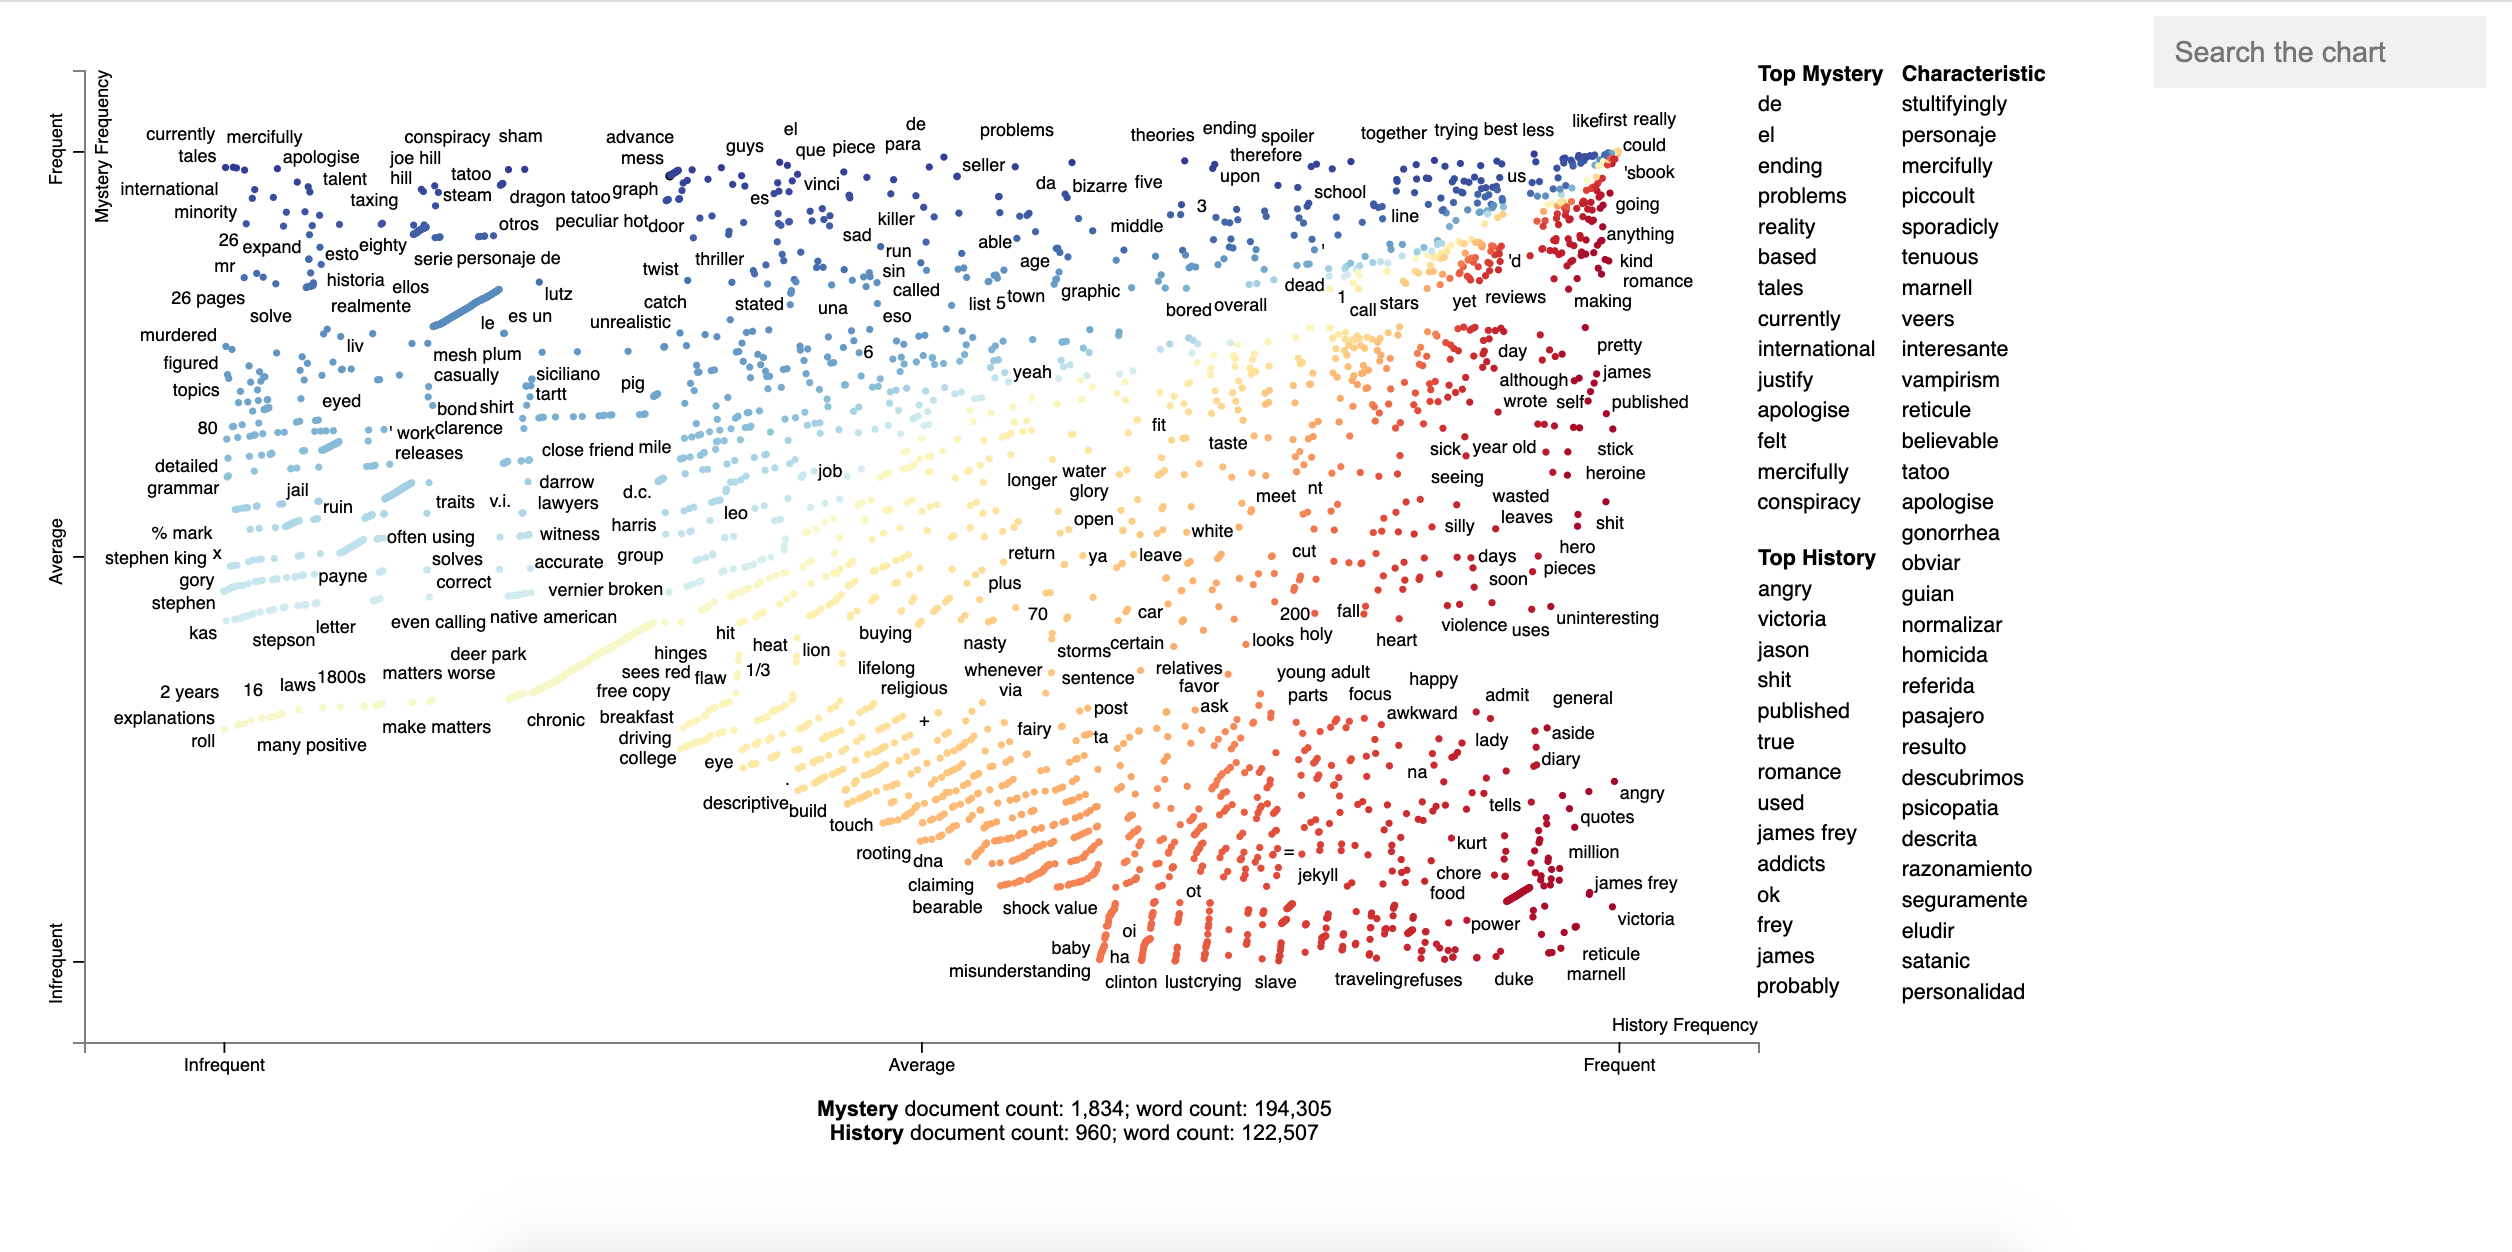

In [32]:
Image(filename = "../visualizations/mystery_history_low.png", width =4000, height = 1000)

#Uncomment to display html version
#IFrame(src='../visualizations/mystery_history_low.html', width=700, height=600)

### Frequent terms in History vs. Mystery in positive reviews

In [51]:
#Image(filename = "../visualizations/mystery_history_high.png", width =4000, height = 1000)

#Uncomment to display html version(it takes about 7 to 10 minutes to load)
#IFrame(src='../visualizations/mystery_history_high.html', width=700, height=600)

###  Frequent terms in Children vs. Mystery genres in negative reviews

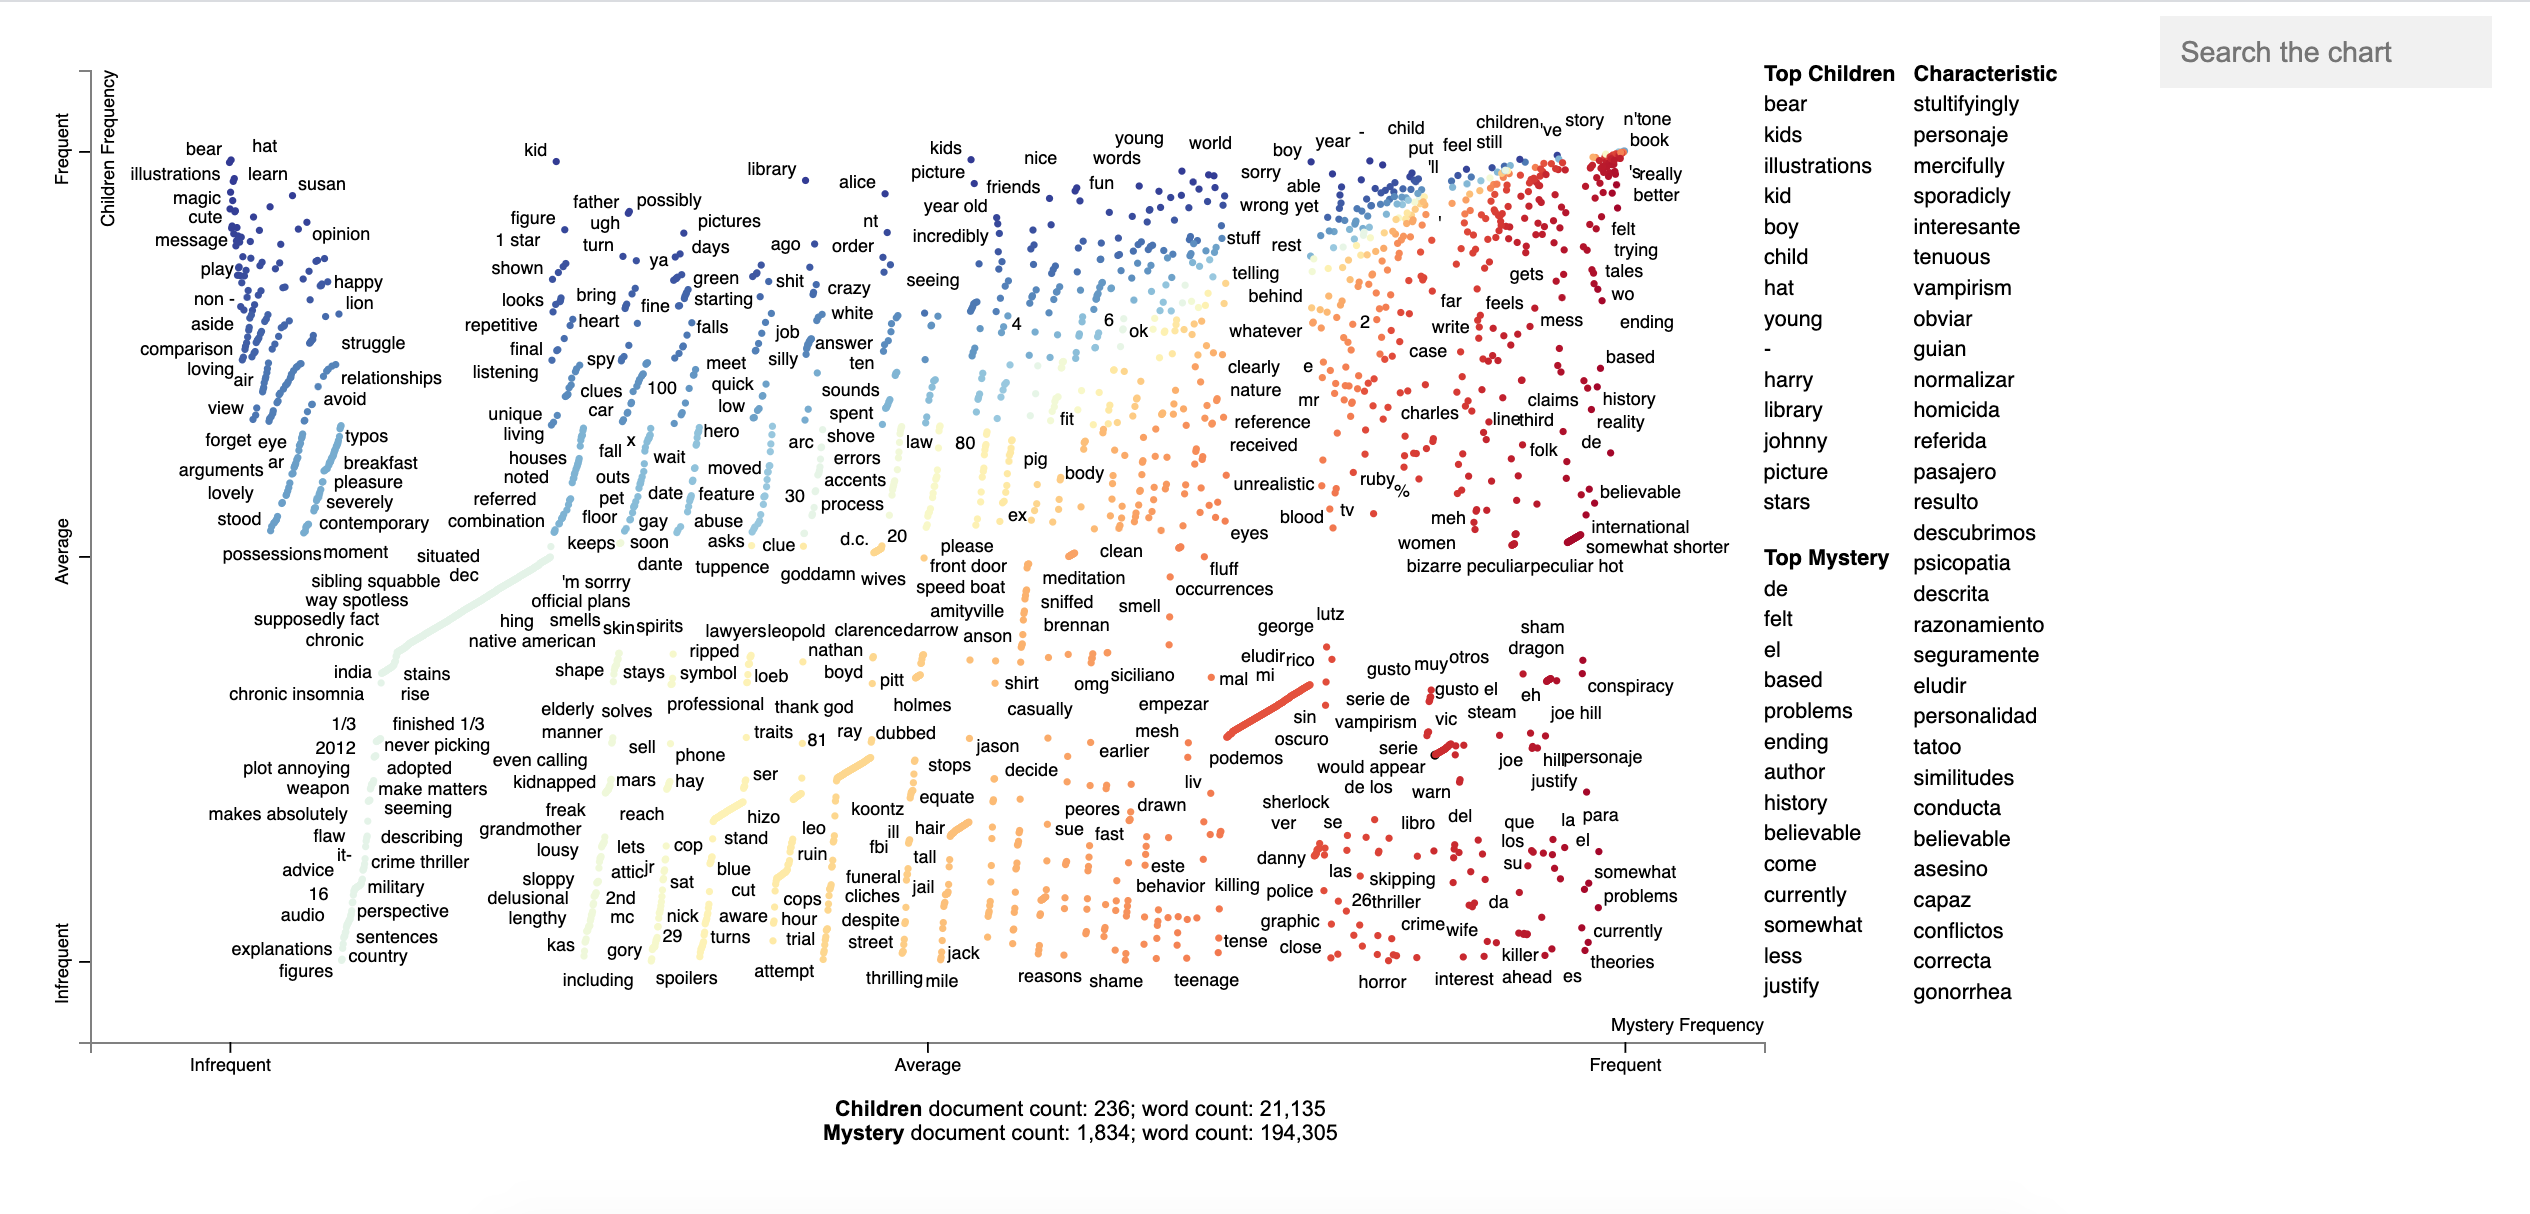

In [48]:
Image(filename = "../visualizations/children_mystery_low.png", width = 2000)

#Uncomment to display html version
#IFrame(src='../visualizations/children_mystery_low.html', width=700, height=600)

### Frequent terms in Children vs. Mystery in positive reviews

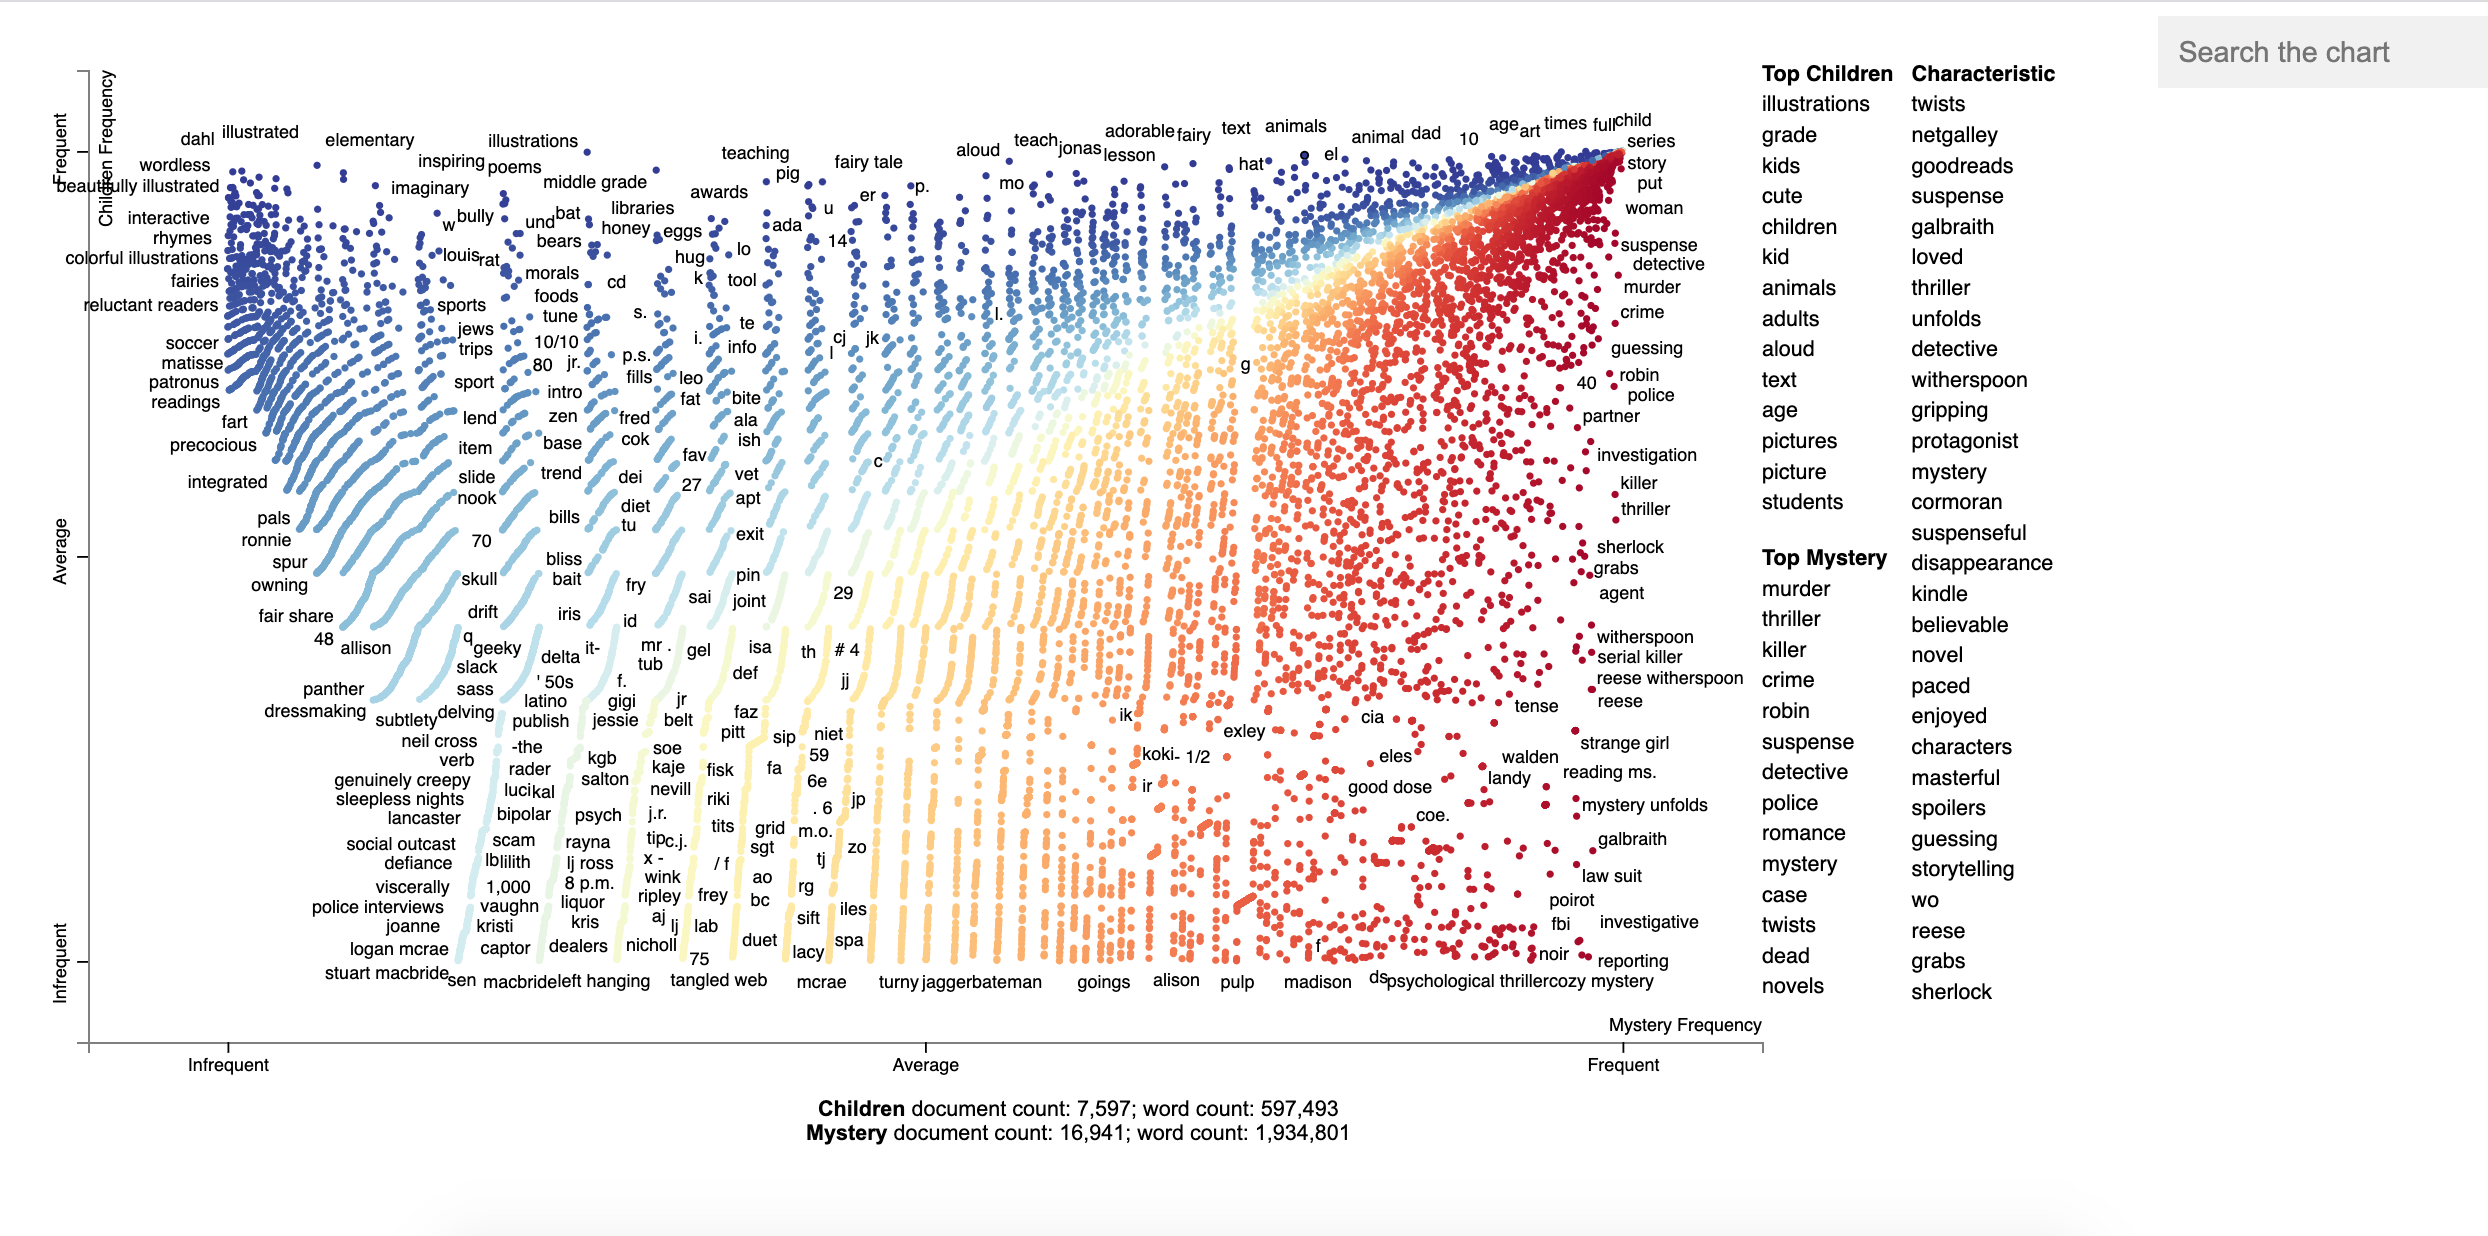

In [50]:
Image(filename = "../visualizations/children_mystery_high.png", width =2000, height = 1000)

#Uncomment to display html version
#IFrame(src='../visualizations/children_mystery_high.html', width=700, height=600)

### Frequent terms in Children vs. History in negative reviews

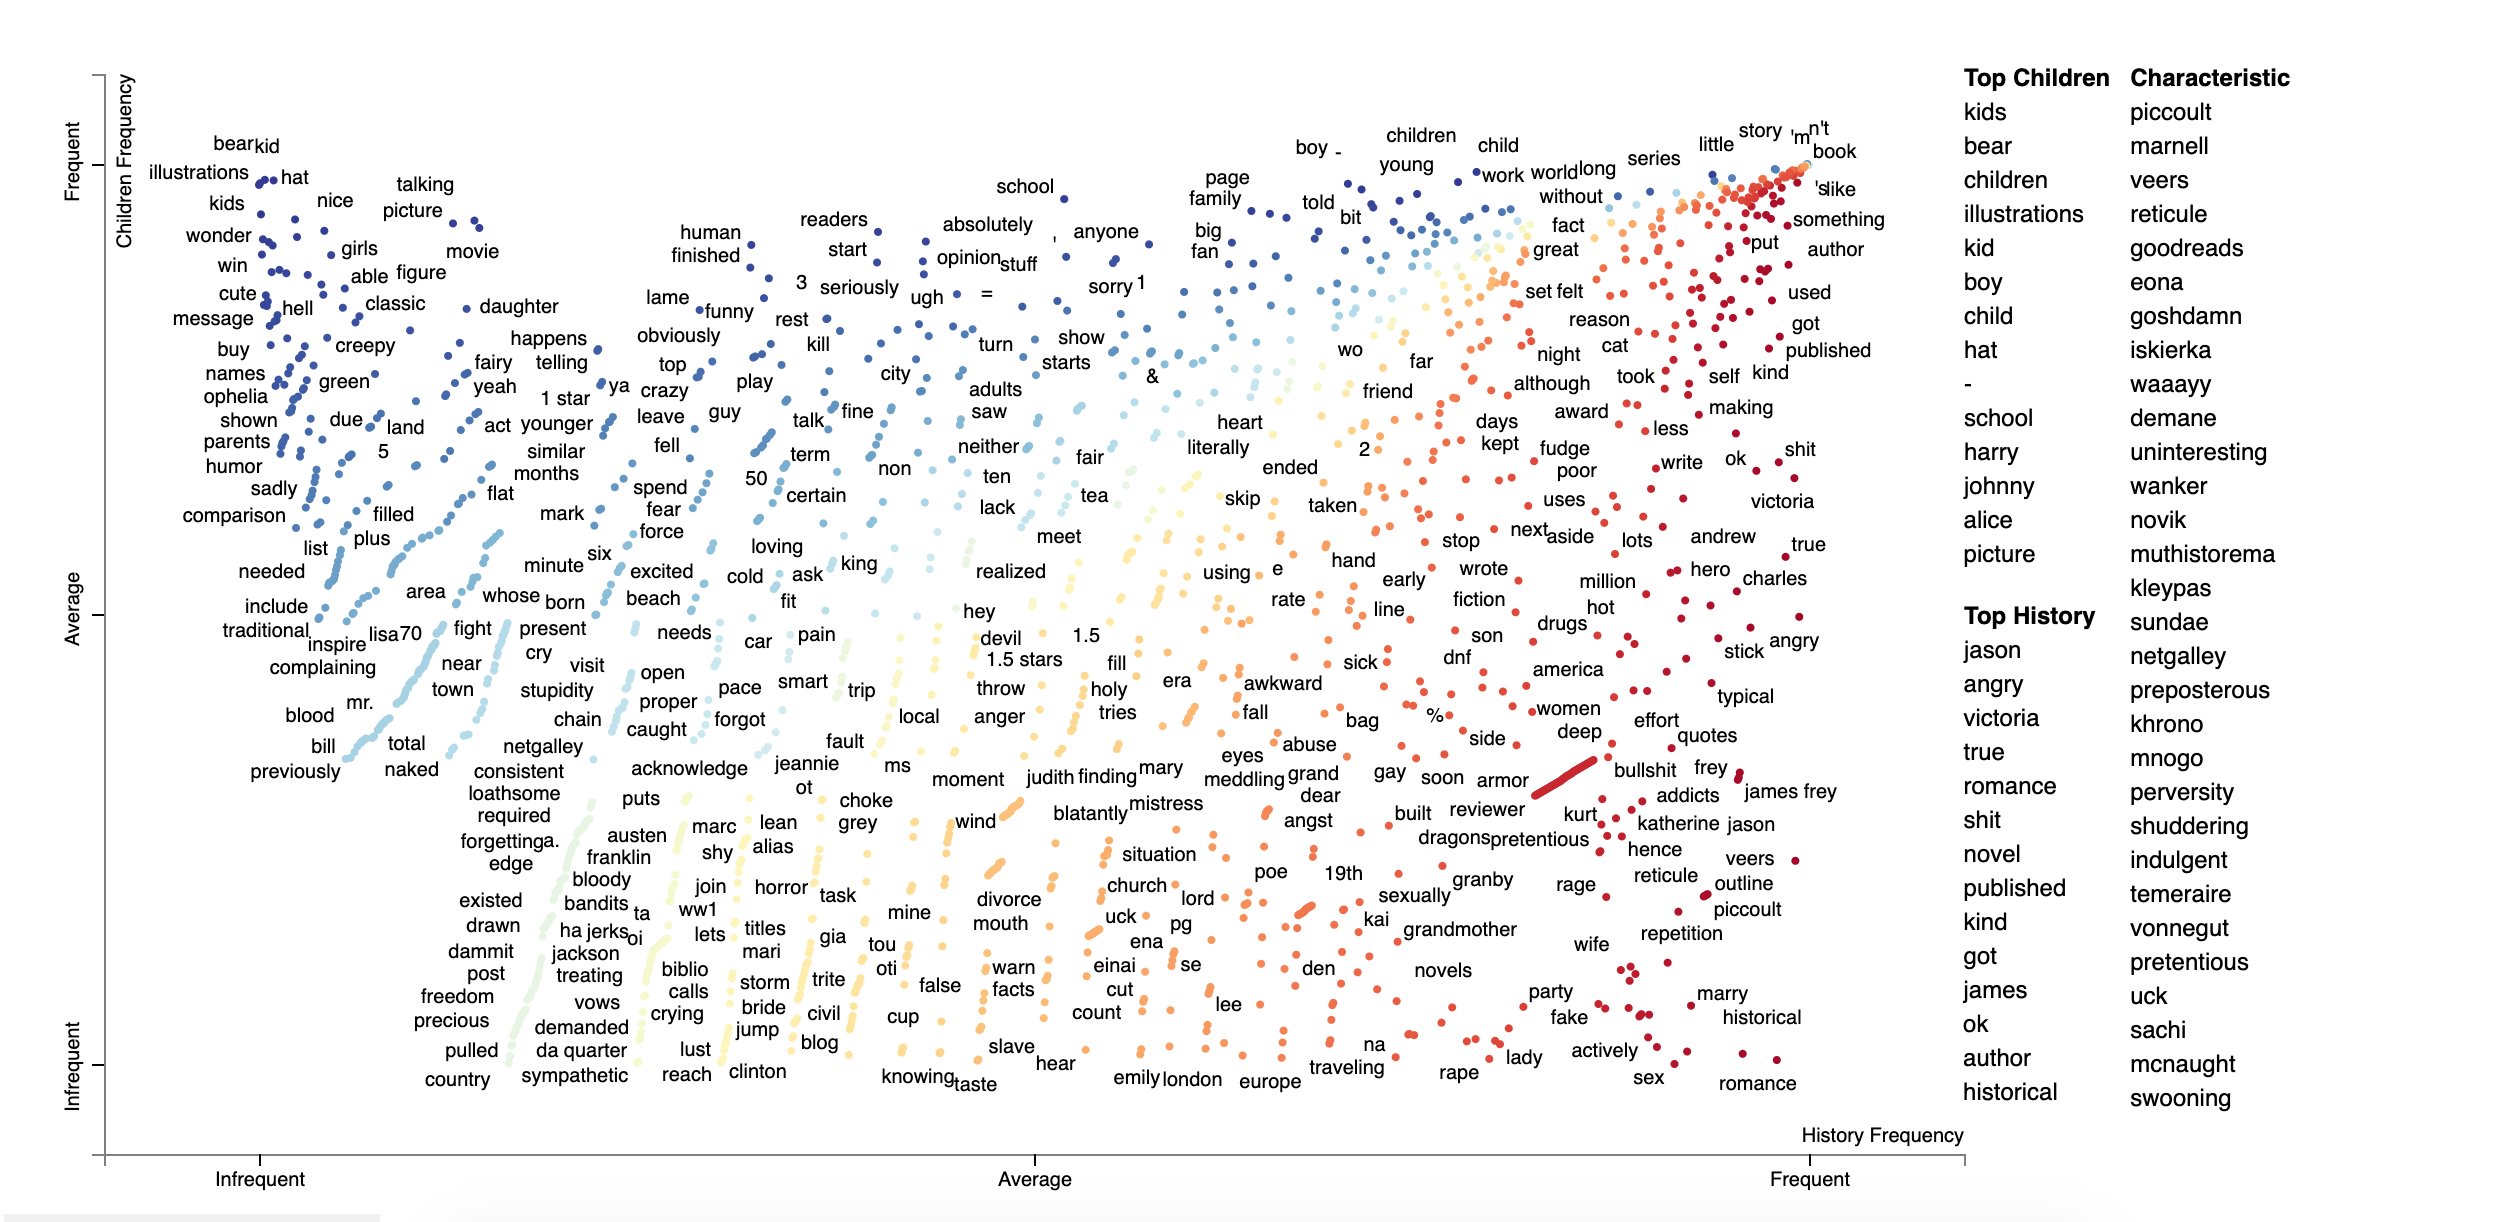

In [4]:
Image(filename = "../visualizations/children_history_low.png", width =2000, height = 1000)

#Uncomment to display html version(it takes about 7-10 minutes to load)
#IFrame(src='../visualizations/children_history_low.html.html', width=700, height=600)

### Frequent terms in Children vs. History in positive reviews

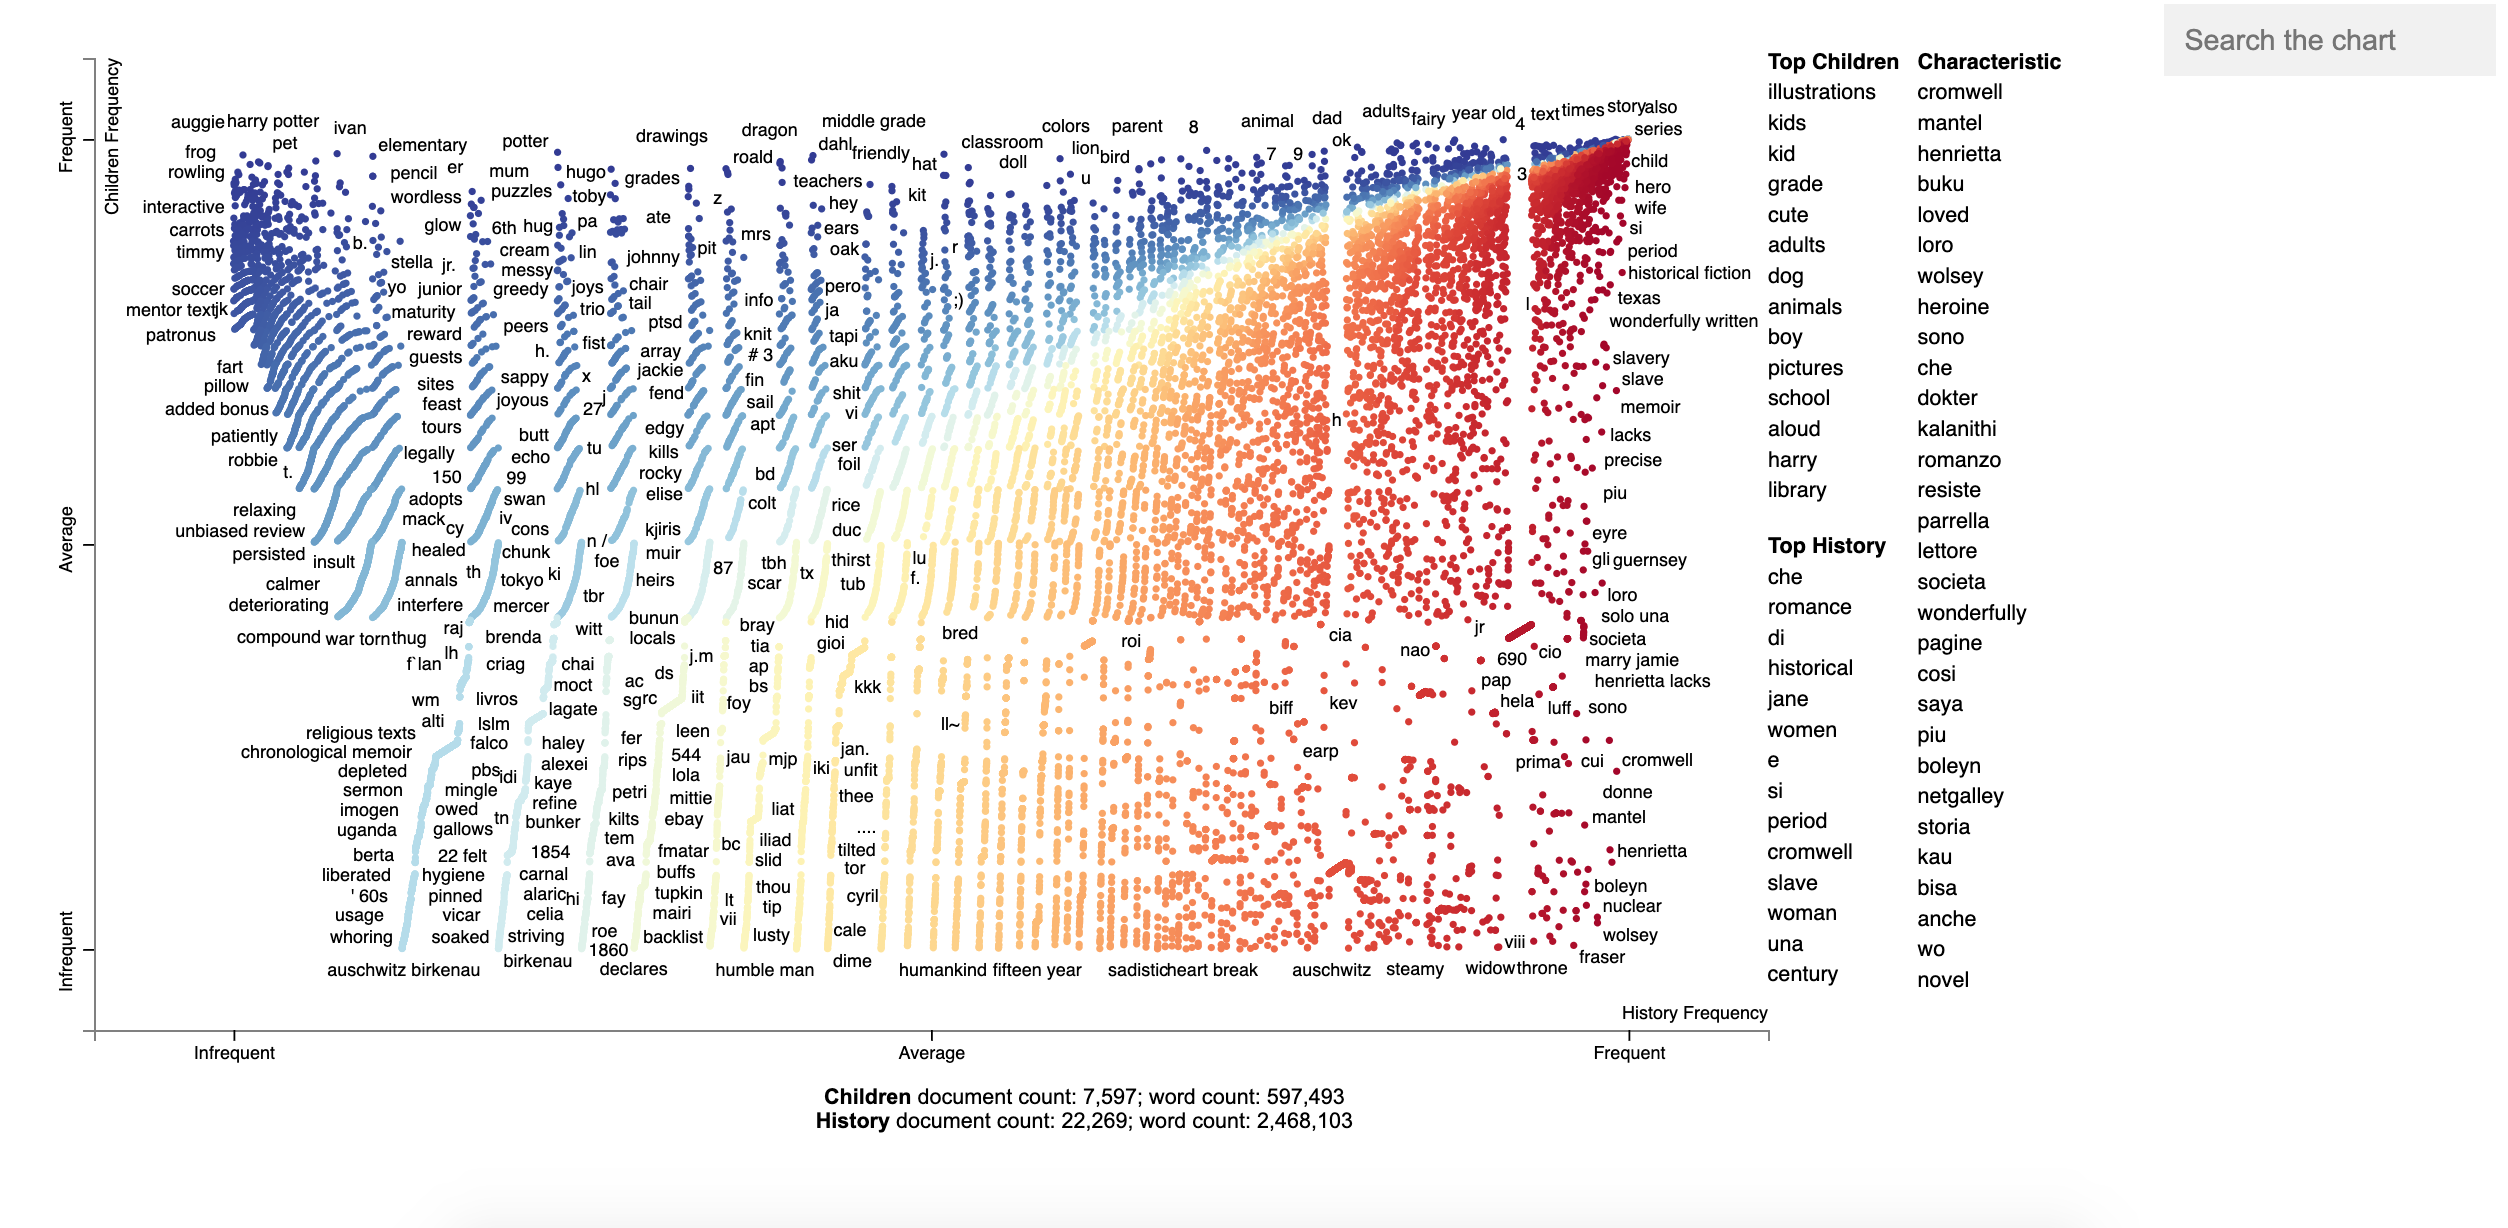

In [3]:
Image(filename = "../visualizations/children_history_high.png", width =2000, height = 1000)

#Uncomment to display html version(it takes about 7-10 minutes to load)
#IFrame(src='../visualizations/children_history_high.html', width=700, height=600)

## Task 2: Extract topics within different genres for positive and negative reviews

For this next section, we will explore the prominent topics in each genre for both the poorly rated and highly rated reviews. This task is made possible through the library Empath (Fast et al., 2016). Empath is a tool that analyzes text across lexical categories (or topics) and generate new categories from text. For instance, terms like “smile” and “laugh” generate the category "joy".
To visualize Empath topics with Scattertext, we need to install Empath, an open source Python library, and create a Corpus of extracted topics. Please, refer to the installation section in the document for more details on how to install empath.

In [23]:
# function to create plots for different dataframes
def empath(df, category, category_name, not_category_name, title):
    ''' Input- dataframe, category, 
    name of the category, second category,
    title of the plot
    -Output- stand-alone hmtl file of the visualization(scatterplot)'''
    
    feat_builder = st.FeatsFromOnlyEmpath()
    empath_corpus = st.CorpusFromParsedDocuments(df,
                                              category_col='genre',
                                              feats_from_spacy_doc=feat_builder,
                                              parsed_col='review_text').build()

    html = st.produce_scattertext_explorer(empath_corpus,
                                     category=category,
                                     category_name=category_name,
                                     not_category_name=not_category_name,
                                     width_in_pixels=1000,
                                     use_non_text_features=True,
                                     use_full_doc=True,
                                    topic_model_term_lists=feat_builder.get_top_model_term_lists())
    
    return open("../visualizations/"+title+"-Empath"+"."+"html", 'wb').write(html.encode('utf-8'))

### Topics in Children vs. Mystery genres in negative reviews

In [24]:
#generate plot for low rated children and mystery
empath(l_c_m,'children', 'Children','Mystery','children_mystery_low')

1260829

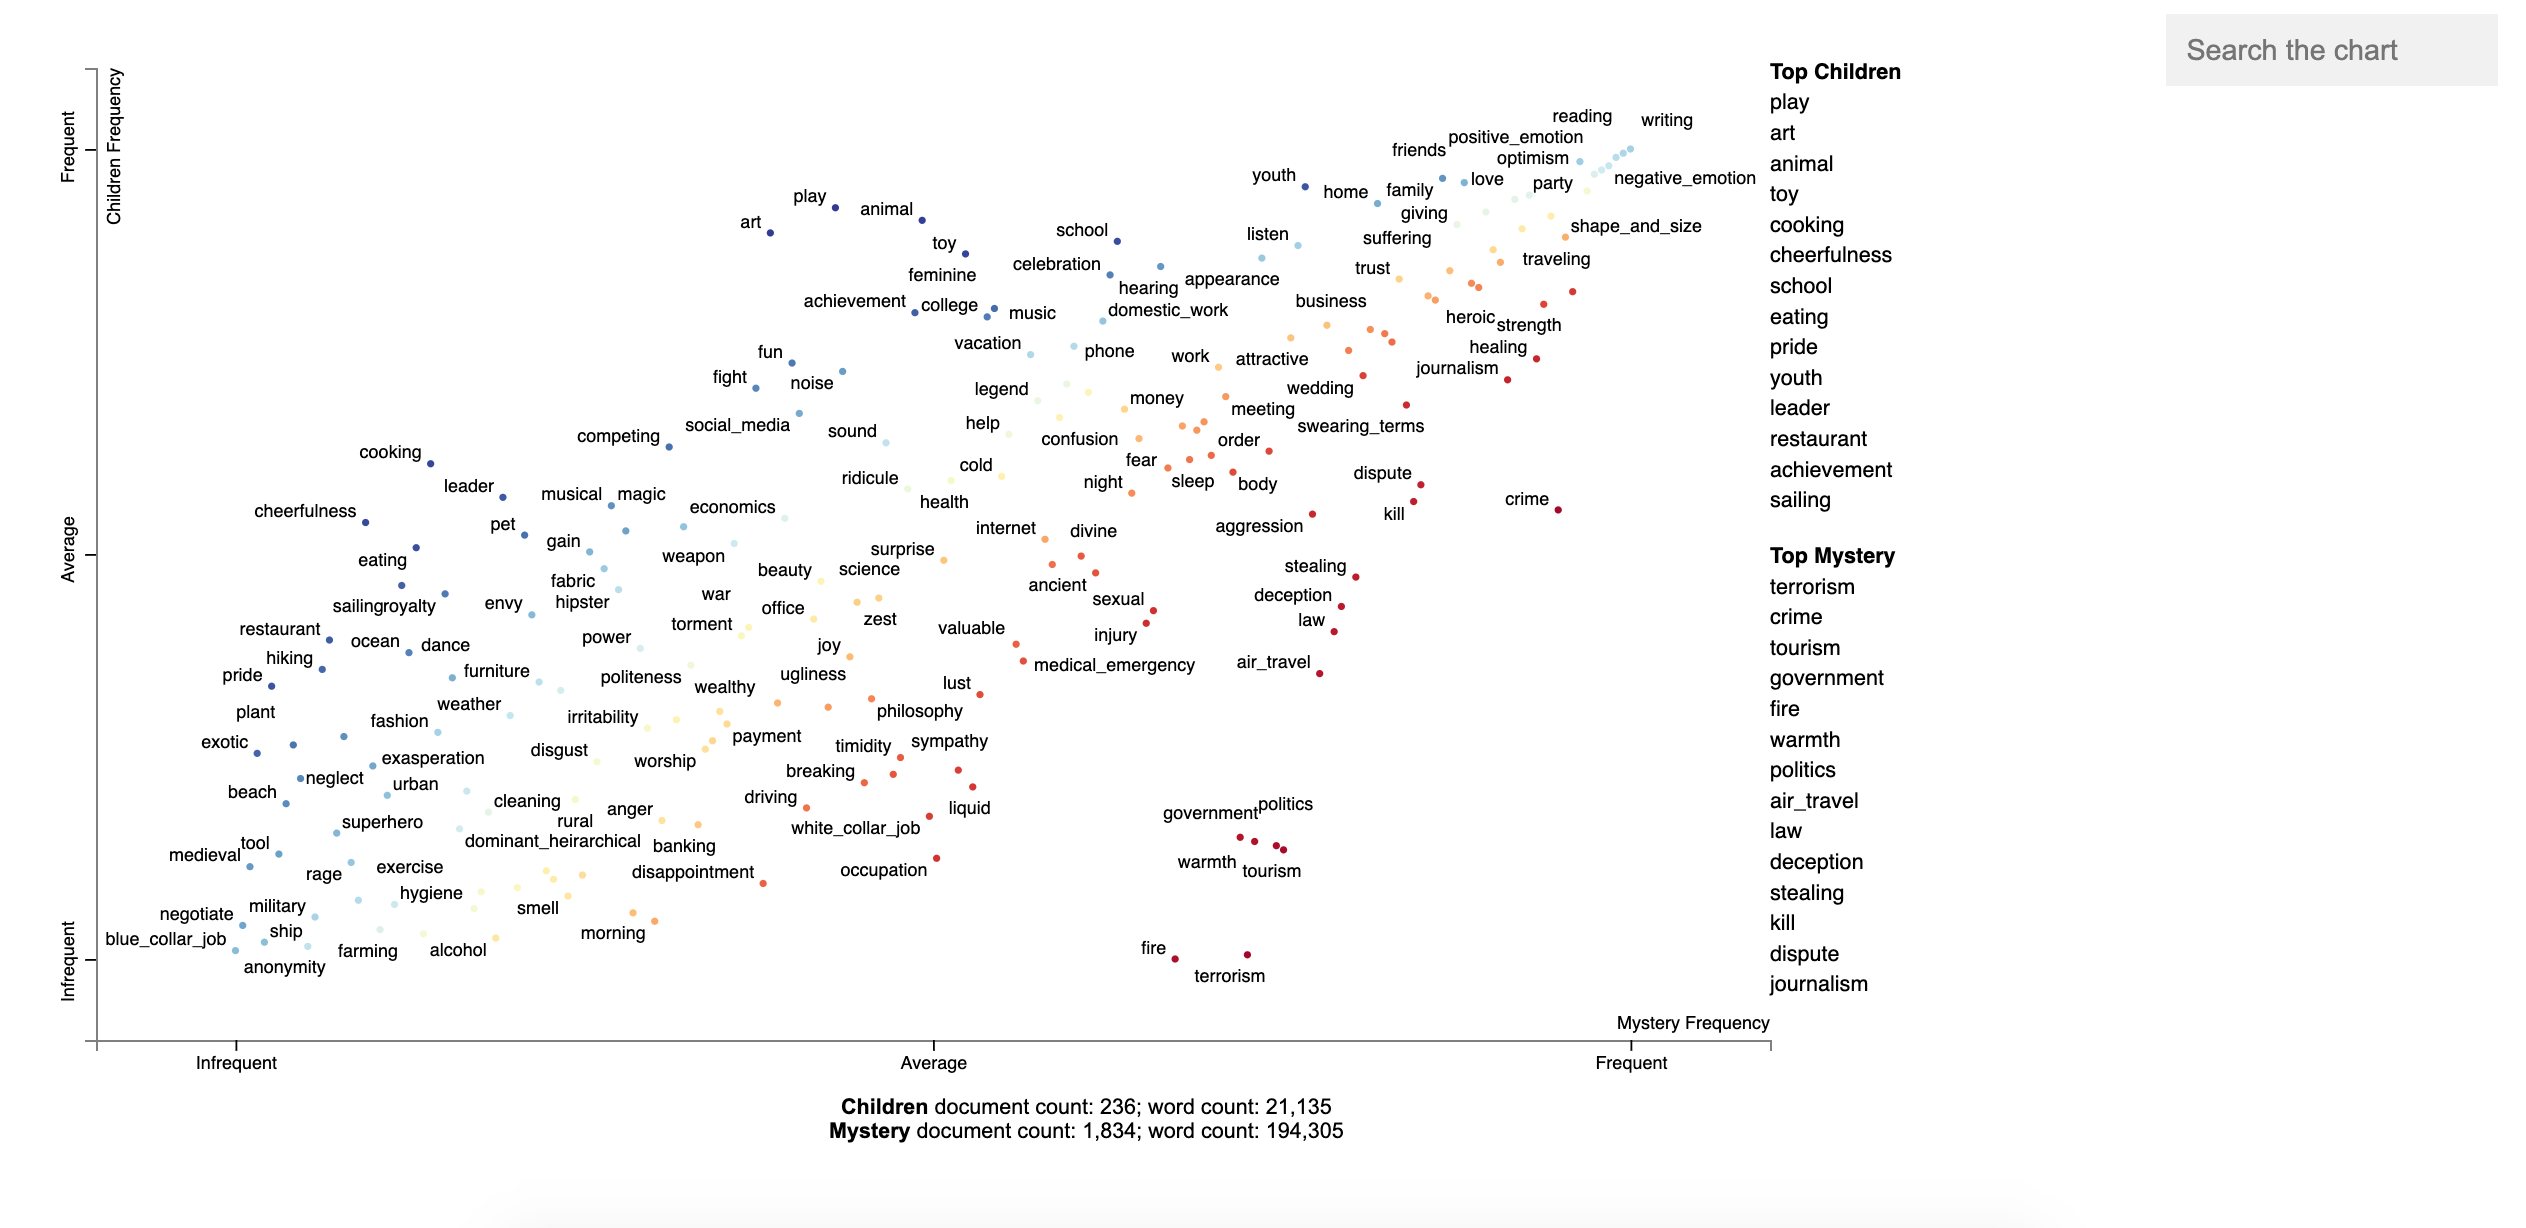

In [6]:
Image(filename = "../visualizations/children_mystery_low_empath.png", width =3000, height = 1000)

#Uncomment for the interative hmtl version
#IFrame(src='../visualizations/children_mystery_low-Empath.html', width=700, height=600)

### Topics in the Children vs. Mystery genres in positive reviews

In [25]:
#generate plot for highly rated children and mystery
empath(h_c_m,'children', 'Children','Mystery','children_mystery_high')

13256188

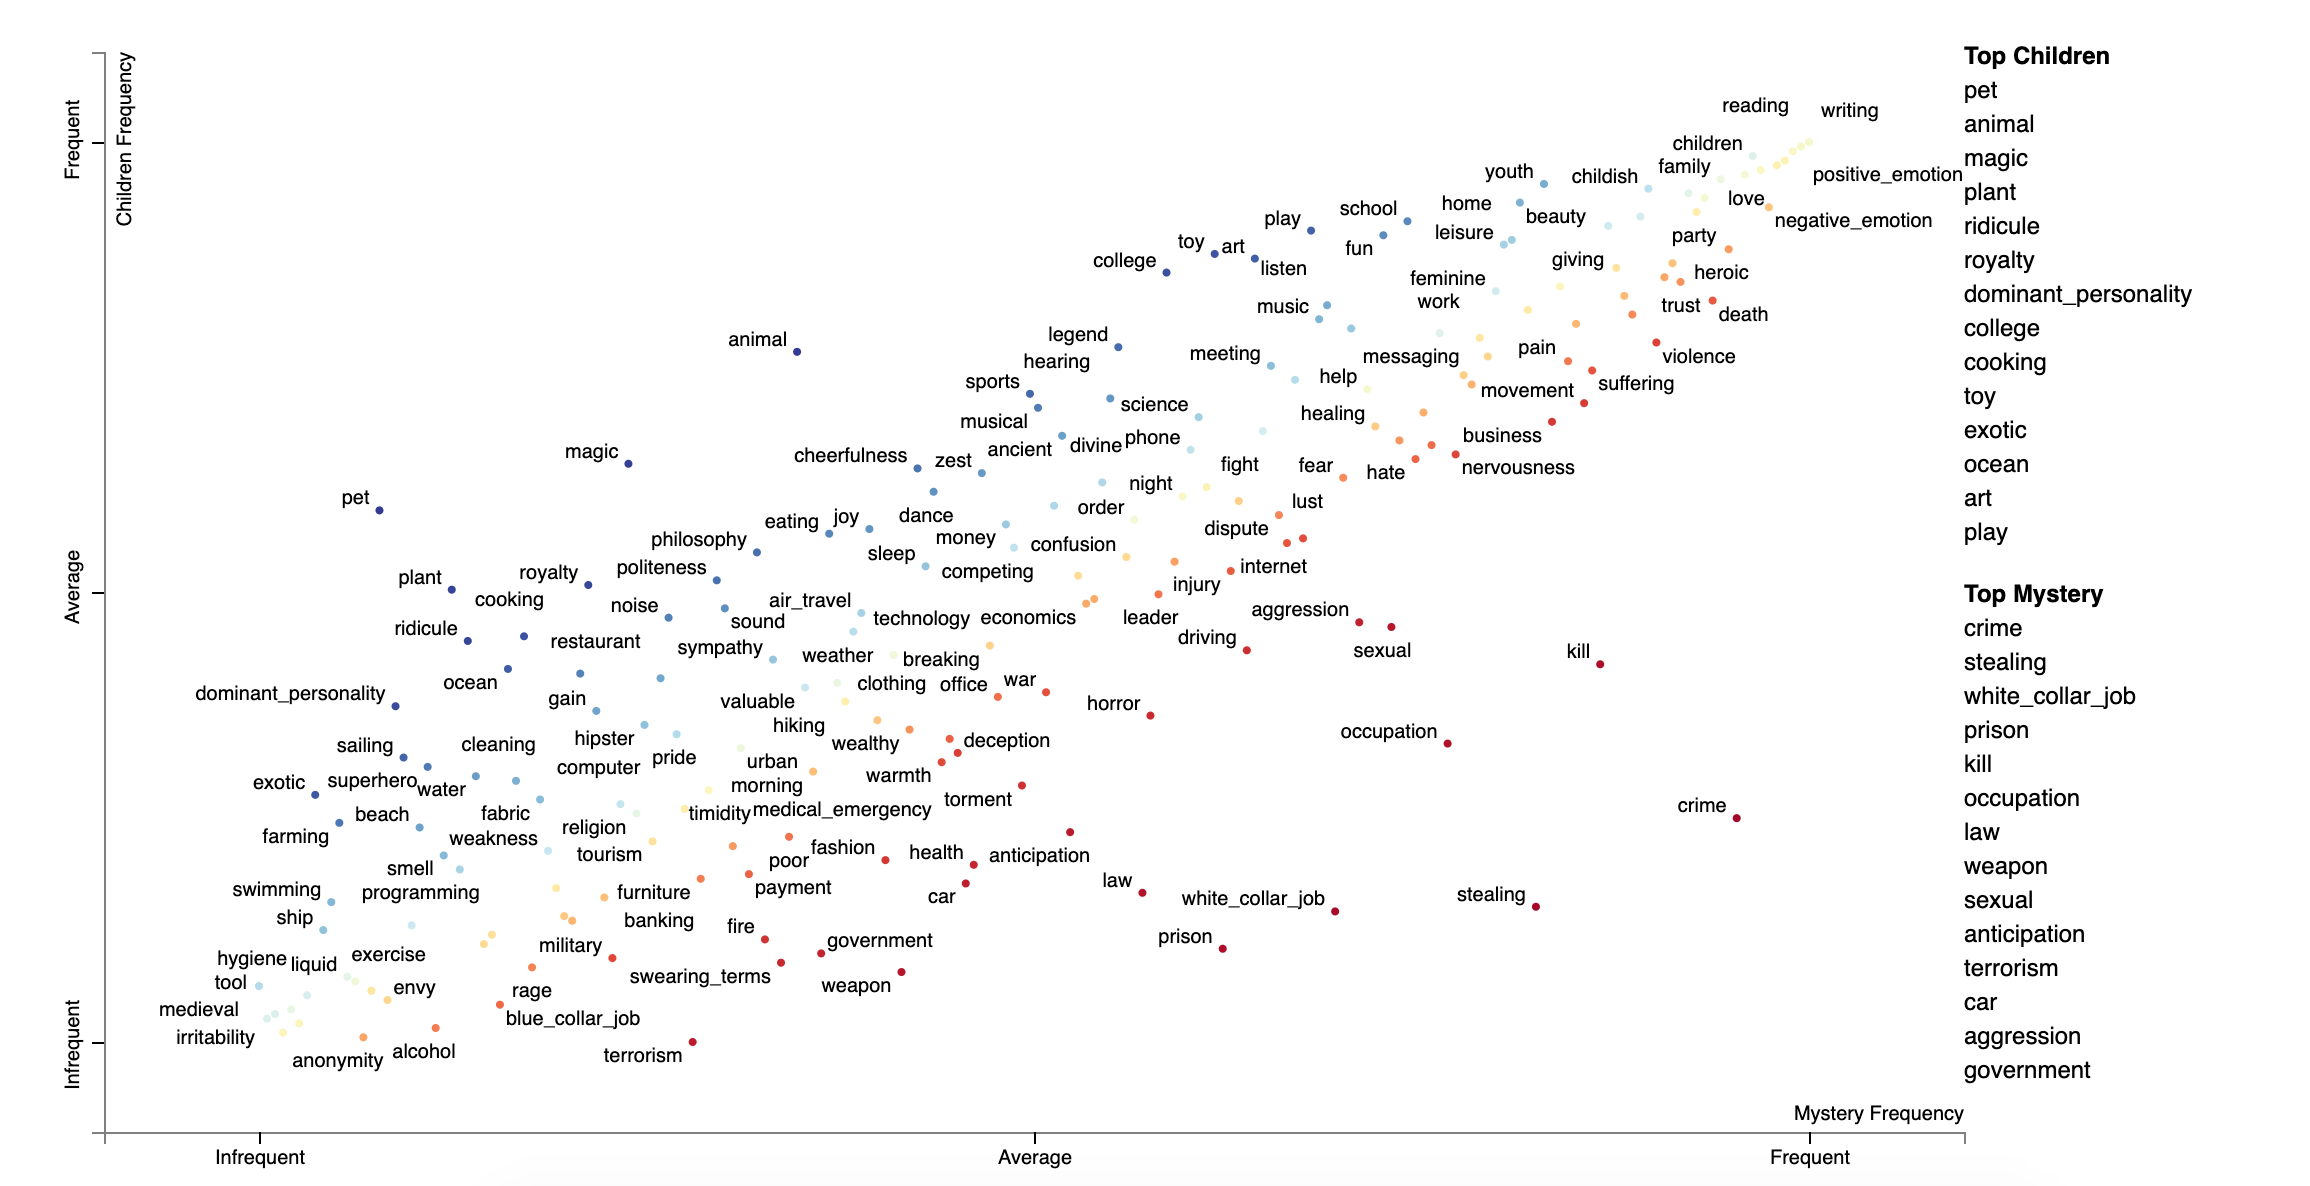

In [21]:
Image(filename = "../visualizations/children_mystery_high_empath.png", width =3000, height = 1000)
# Uncomment for interative version
#IFrame(src='../visualizations/children_mystery_high-Empath.html', width=1000, height=600)

### Topics in Children vs. History genres in negative reviews

In [26]:
# generate plot for poorly rated children and history
empath(l_c_h,'children','Children','History','children_history_low')

1121443

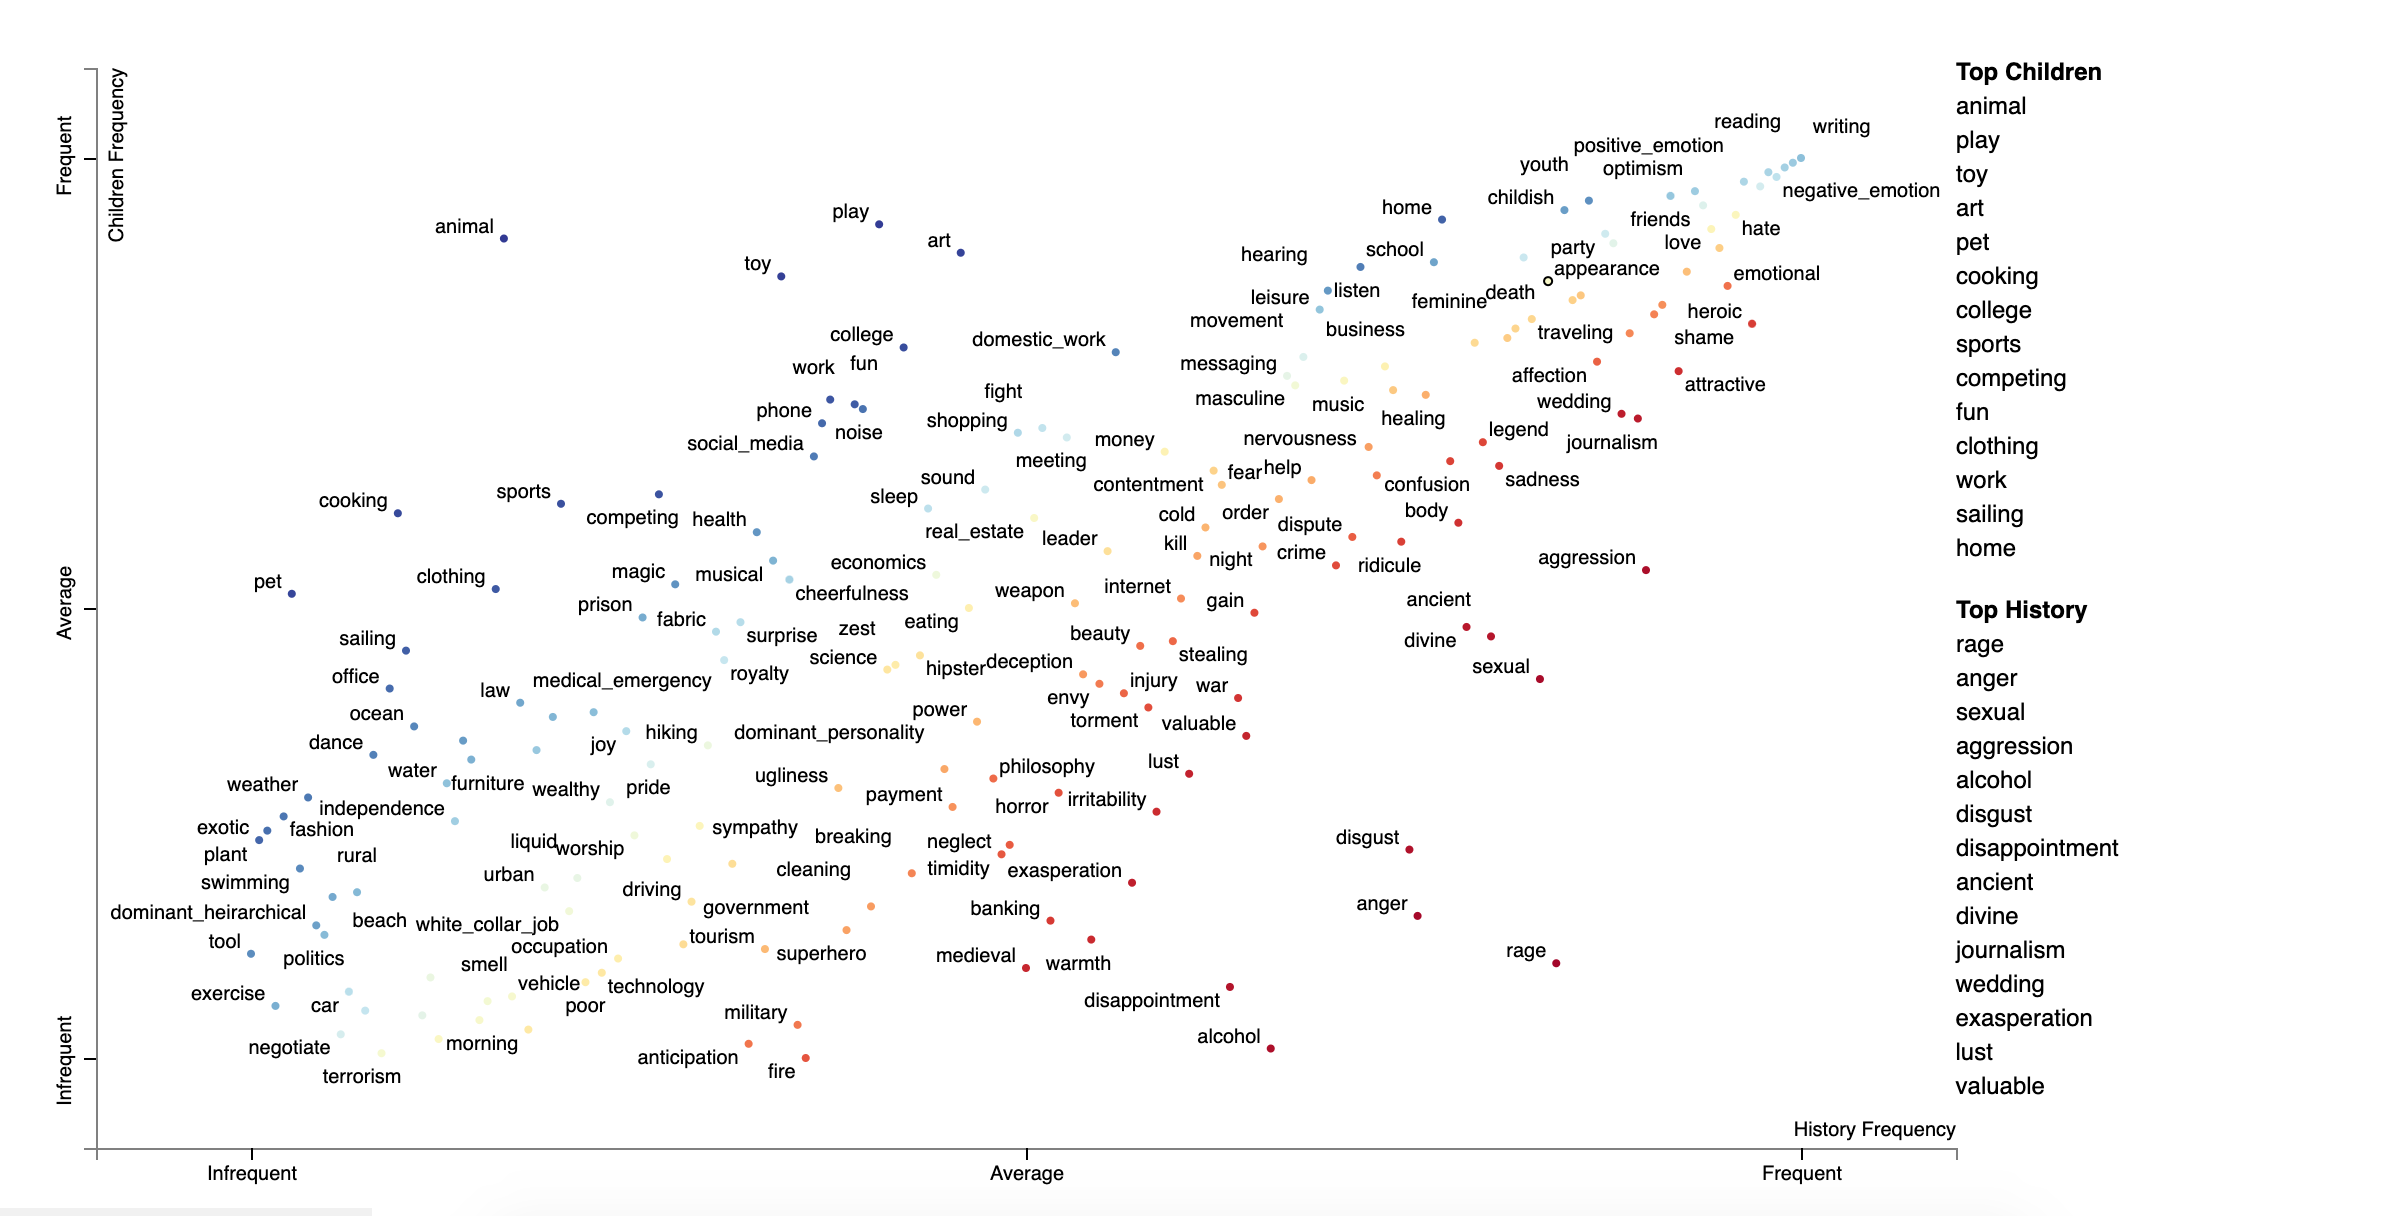

In [14]:
Image(filename = "../visualizations/children-history_low-empath.png", width =3000, height = 1000)

#uncomment for interative visualization
#IFrame(src='../visualizations/children_history_low-Empath.html', width=1000, height=600)

### Topics in Children vs. History genres in positive reviews

In [27]:
# generate plot for highly rated children and history
empath(h_c_h,'children','Children','History','children_history_high')

13802421

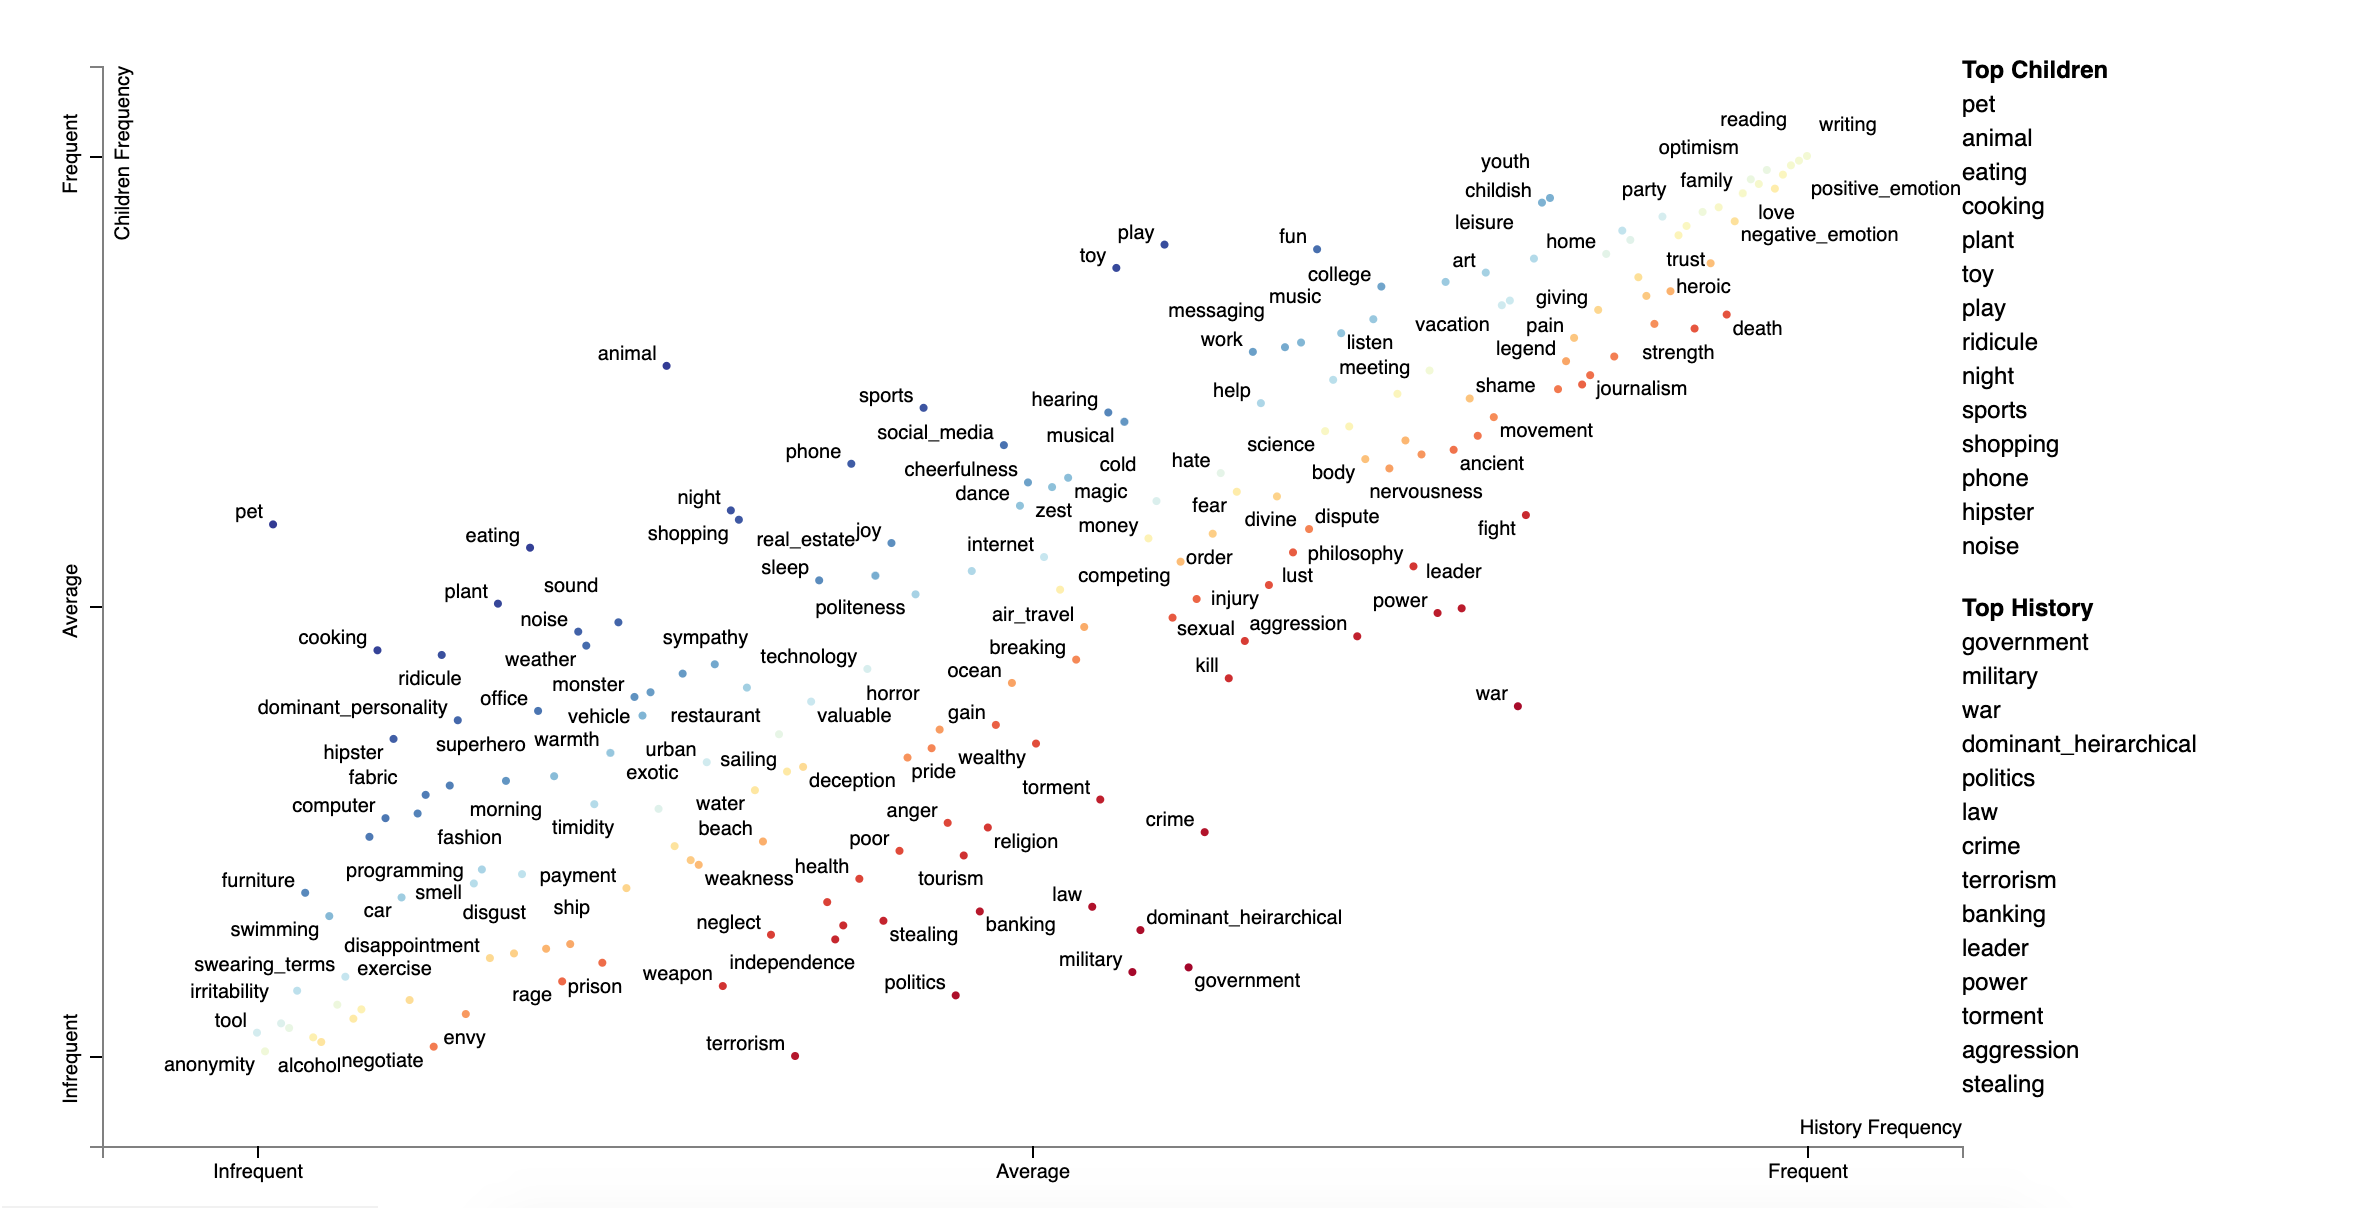

In [16]:
Image(filename = "../visualizations/children_history_high_empath.png", width =3000, height = 1000)

#uncomment for interative visualization
#IFrame(src='../visualizations/children_history_high-Empath.html', width=1000, height=600)

### Topics in Mystery vs. History genres in negative reviews

In [28]:
# generate plot for poorly rated mystery and history
empath(l_m_h,'mystery','Mystery','History','mystery_history_low')

1442754

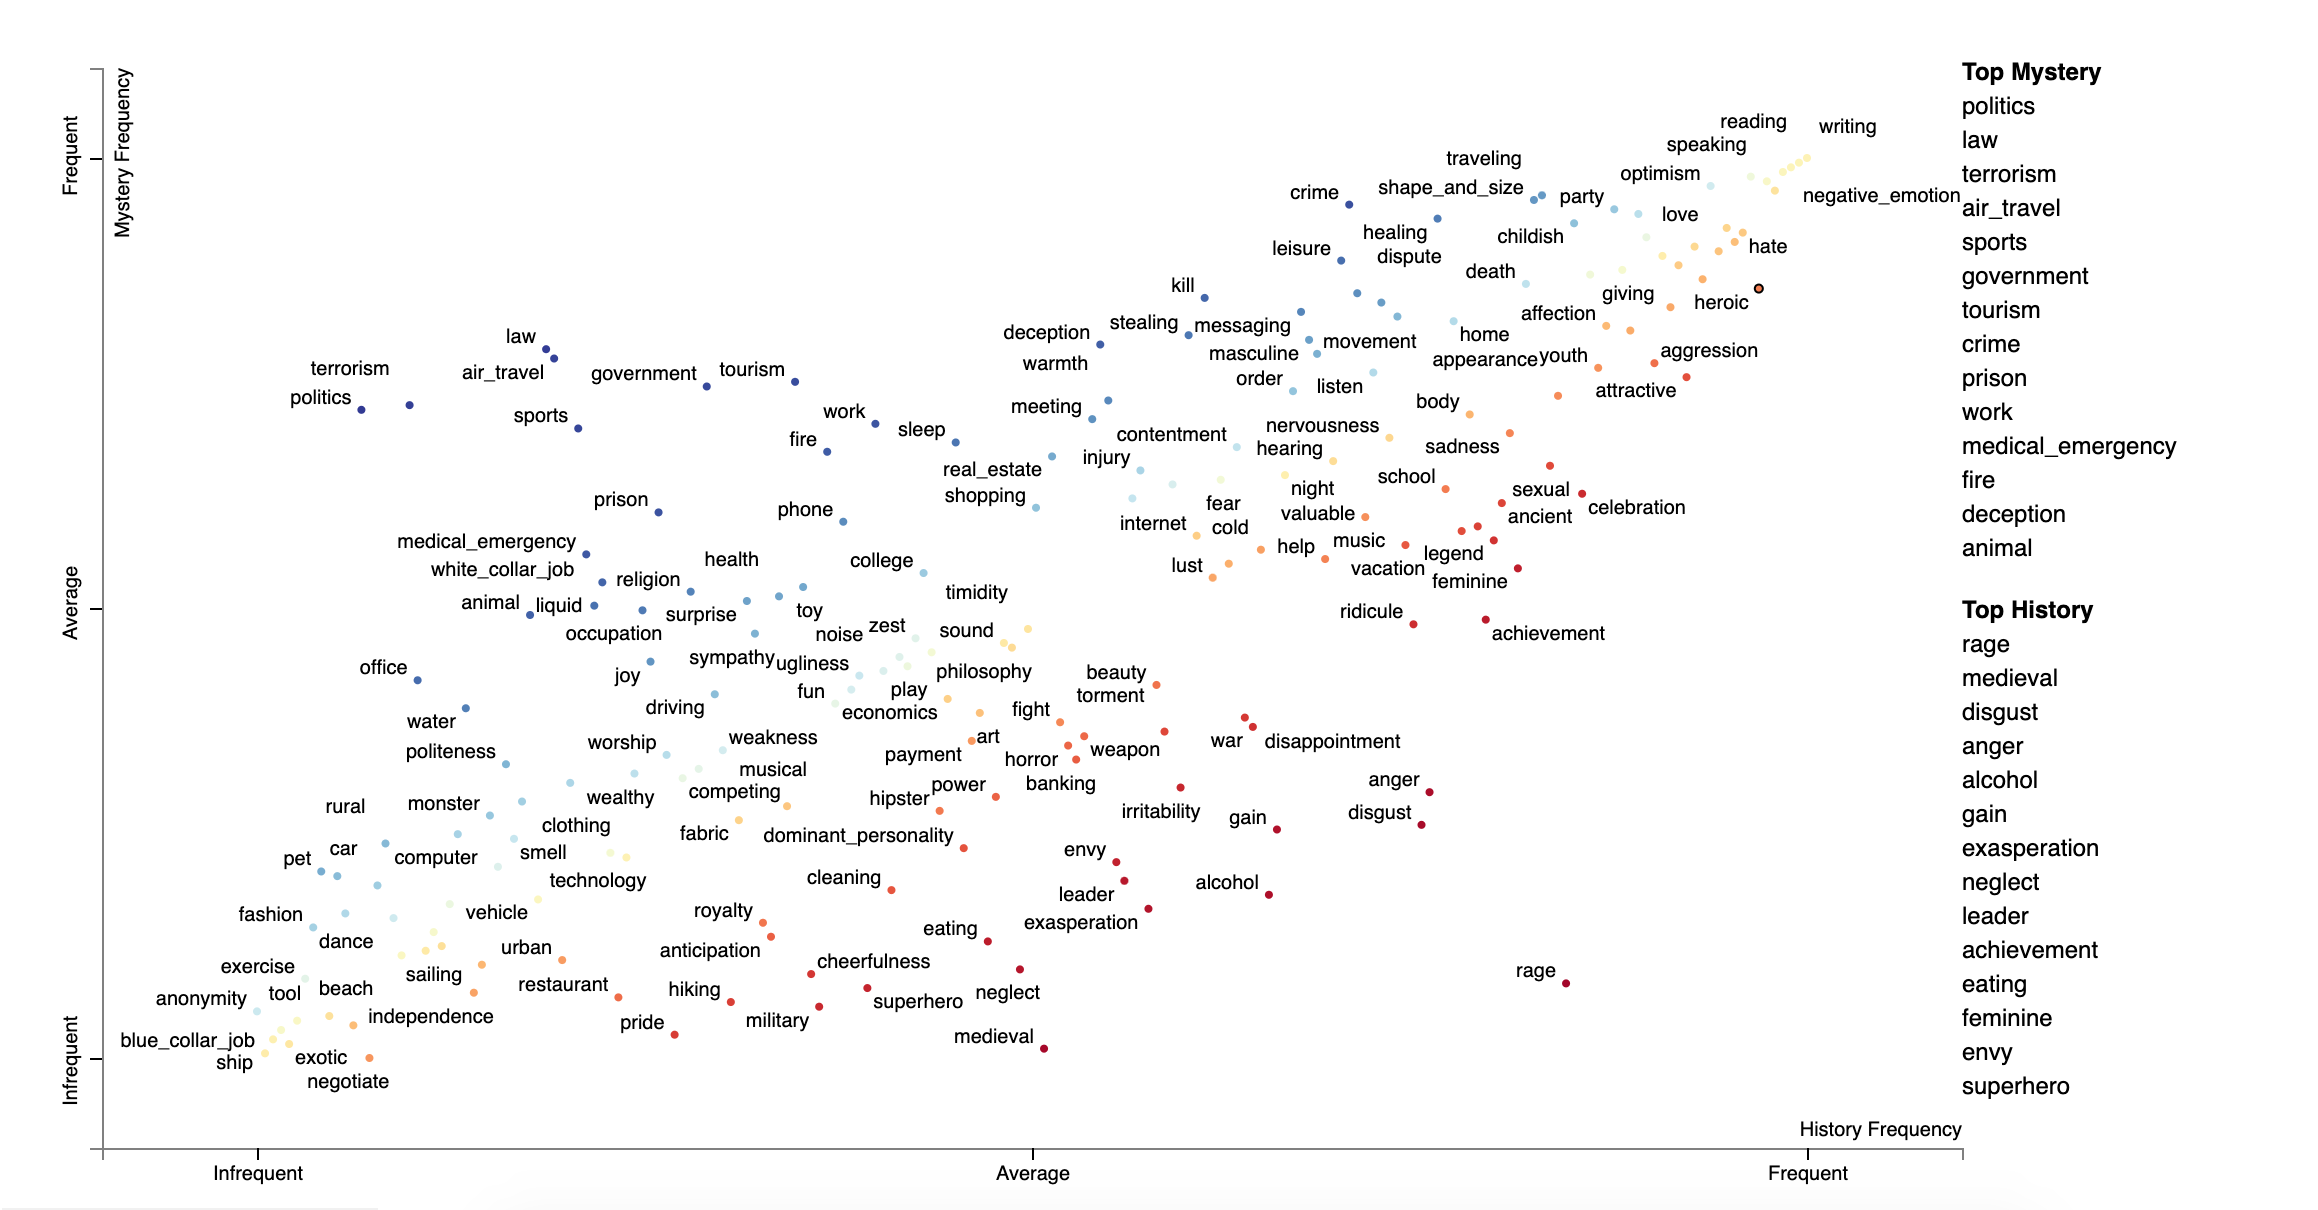

In [19]:
Image(filename = "../visualizations/mystery_history_low_empath.png", width =3000, height = 1000)

#uncomment for interative visualization
#IFrame(src='../visualizations/children_history_low-Empath.html', width=1000, height=600)

### Topics in Mystery vs. History genres in positive reviews

In [29]:
# generate plot for highly rated mystery and history
empath(h_m_h,'mystery','Mystery','History','mystery_history_high')

15746922

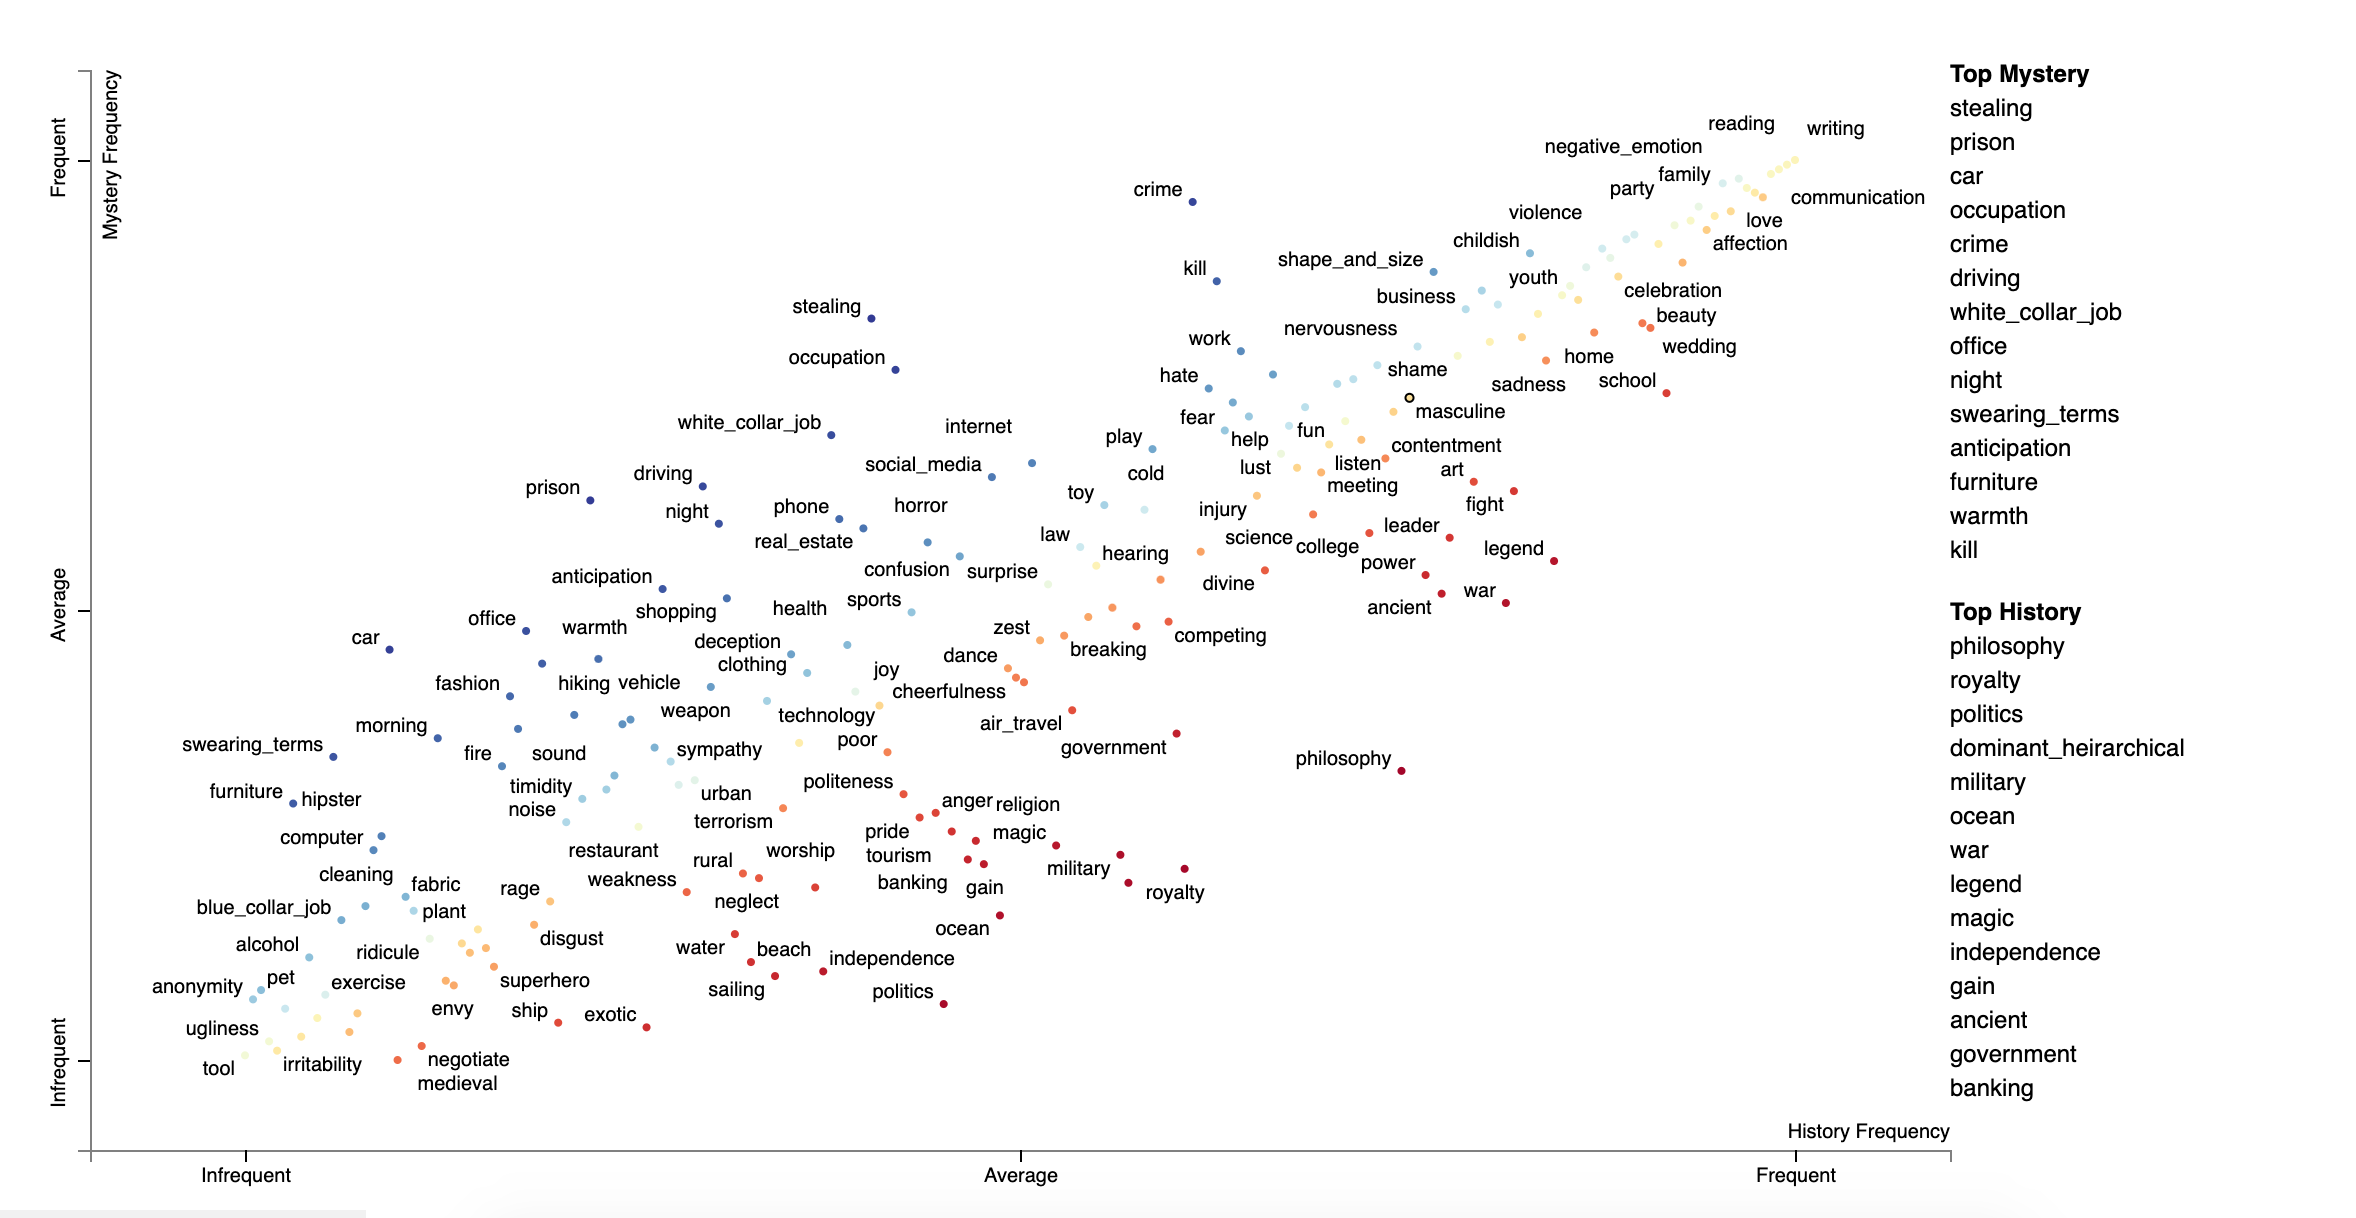

In [30]:
Image(filename = "../visualizations/mystery_history_high_empath.png", width =3000, height = 1000)

#uncomment for interative visualization
#IFrame(src='../visualizations/mystery_history_high-Empath.html', width=1000, height=600)